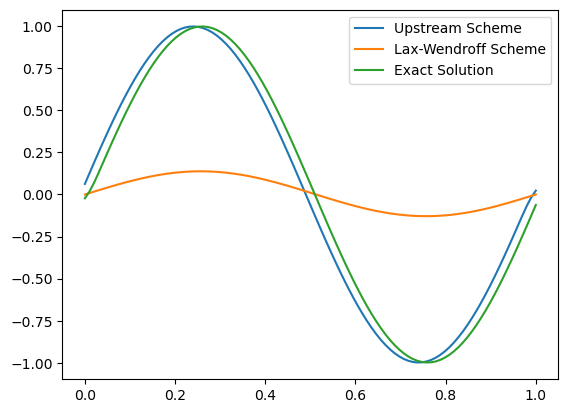

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the advection equation
def advection_eq(u, c, dx, dt):
    return u - c * (dt/dx) * (u - np.roll(u,1))

# Define the upstream scheme
def upstream_scheme(u, c, dx, dt):
    return u - c * (dt/dx) * (u - np.roll(u,-1))

# Define the Lax-Wendroff scheme
def lax_wendroff(u, c, dx, dt):
    u_new = np.zeros(len(u))
    for i in range(1, len(u)-1):
        u_new[i] = 0.5 * (u[i+1] + u[i-1]) - 0.5 * c * (dt/dx) * (u[i+1] - u[i-1])
    return u_new

# Initial conditions
x = np.linspace(0, 1, 100)
u_0 = np.sin(2*np.pi*x)
c = 0.1
dx = x[1] - x[0]
dt = 0.0001

# Time-stepping
u_upstream = u_0.copy()
u_lax = u_0.copy()
u_exact = u_0.copy()
for i in range(1000):
    u_upstream = upstream_scheme(u_upstream, c, dx, dt)
    u_lax = lax_wendroff(u_lax, c, dx, dt)
    u_exact = advection_eq(u_exact, c, dx, dt)

# Plot the results
plt.plot(x, u_upstream, label='Upstream Scheme')
plt.plot(x, u_lax, label='Lax-Wendroff Scheme')
plt.plot(x, u_exact, label='Exact Solution')
plt.legend()
plt.show()


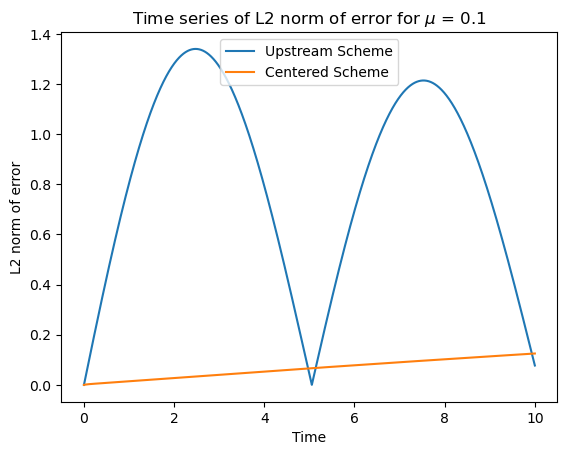

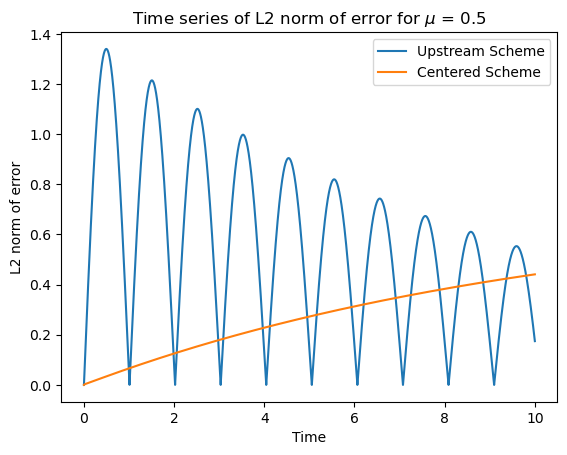

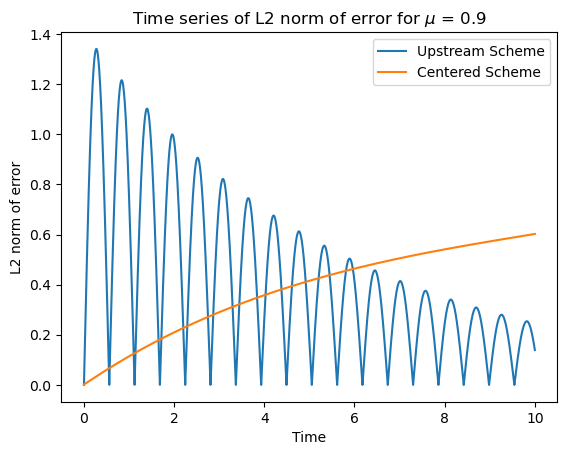

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the advection equation
def advection_eq(u, c, dx, dt):
    return u - c * (dt/dx) * (u - np.roll(u,1))

# Define the upstream scheme
def upstream_scheme(u, c, dx, dt):
    return u - c * (dt/dx) * (u - np.roll(u,-1))

# Define the centered scheme
def centered_scheme(u, c, dx, dt):
    return u - 0.5 * c * (dt/dx) * (np.roll(u,-1) - np.roll(u,1))

# Define the L2 norm of the error
def l2_norm(u, u_exact):
    return np.sqrt(np.sum((u - u_exact)**2)/len(u))

# Initial conditions
x = np.linspace(0, 1, 100)
u_0 = np.sin(2*np.pi*x)
c = 0.1
dx = x[1] - x[0]
dt = 0.0001
T = x[-1]/c



# Loop through different values of mu
for c in [0.1, 0.5, 0.9]:
    # Time-stepping
    u_upstream = u_0.copy()
    u_centered = u_0.copy()
    u_exact = u_0.copy()

    # Time series of L2 norm of error
    l2_up = np.zeros(n_steps)
    l2_cen = np.zeros(n_steps)

    # Time array
    t = np.linspace(0, T, n_steps)
    for i in range(n_steps):
        u_upstream = upstream_scheme(u_upstream, c, dx, dt)
        u_centered = centered_scheme(u_centered, c, dx, dt)
        u_exact = advection_eq(u_exact, c, dx, dt)
        l2_up[i] = l2_norm(u_upstream, u_exact)
        l2_cen[i] = l2_norm(u_centered, u_exact)

    # Plot the results
    plt.plot(t, l2_up, label='Upstream Scheme')
    plt.plot(t, l2_cen, label='Centered Scheme')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('L2 norm of error')
    plt.title(r'Time series of L2 norm of error for $\mu$ = {}'.format(c))
    plt.show()




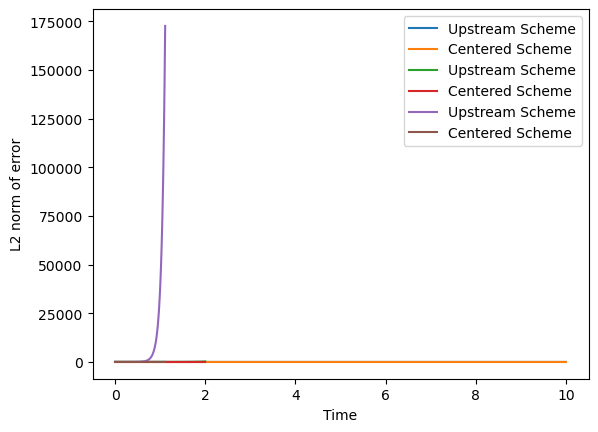

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define spatial and temporal discretization
dx = 0.1
dt = 0.01

# Define x and t
x = np.arange(0, 1+dx, dx)
n_steps = int(x[-1]/dt)

# Define initial condition
u_0 = np.sin(2*np.pi*x)

# Define the upstream scheme
def upstream_scheme(u, c, dx, dt):
    return np.roll(u, -1) - c*dt/dx*(u - np.roll(u, 1))

# Define the centered scheme
def centered_scheme(u, c, dx, dt):
    return u - c*dt/dx*(np.roll(u, -1) - np.roll(u, 1))

# Define the exact solution
def advection_eq(u, c, dx, dt):
    return np.sin(2*np.pi*(x - c*dt))

# Define L2 norm of error
def l2_norm(u, u_exact):
    return np.sqrt(np.sum((u - u_exact)**2)/len(u))

# Loop through different values of mu
for c in [0.1, 0.5, 0.9]:
    # Time-stepping
    u_upstream = u_0.copy()
    u_centered = u_0.copy()
    u_exact = u_0.copy()

    # Time series of L2 norm of error
    l2_up = np.zeros(n_steps)
    l2_cen = np.zeros(n_steps)

    # Time array
    T = x[-1]/c
    t = np.linspace(0, T, n_steps)
    for i in range(n_steps):
        u_upstream = upstream_scheme(u_upstream, c, dx, dt)
        u_centered = centered_scheme(u_centered, c, dx, dt)
        u_exact = advection_eq(u_exact, c, dx, dt)
        l2_up[i] = l2_norm(u_upstream, u_exact)
        l2_cen[i] = l2_norm(u_centered, u_exact)

    # Plot the results
    plt.plot(t, l2_up, label='Upstream Scheme')
    plt.plot(t, l2_cen, label='Centered Scheme')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('L2 norm of error')
    plt.title


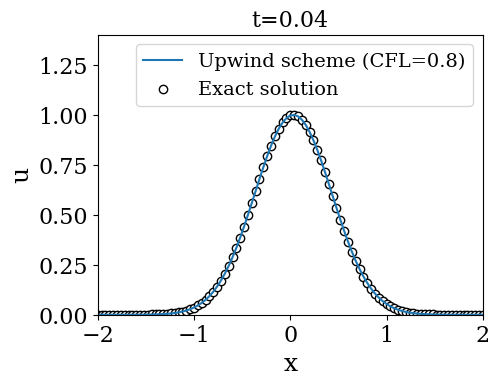

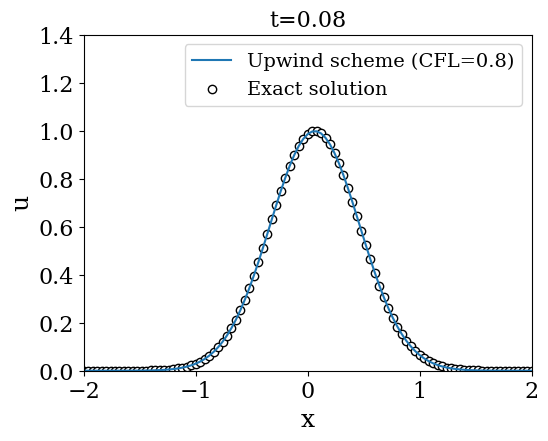

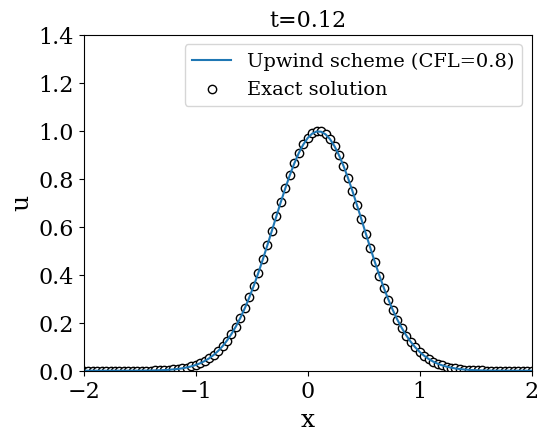

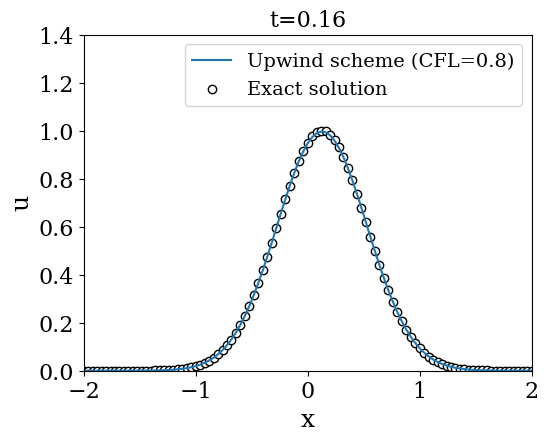

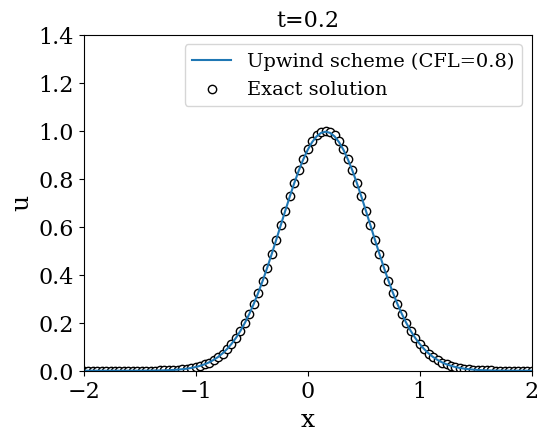

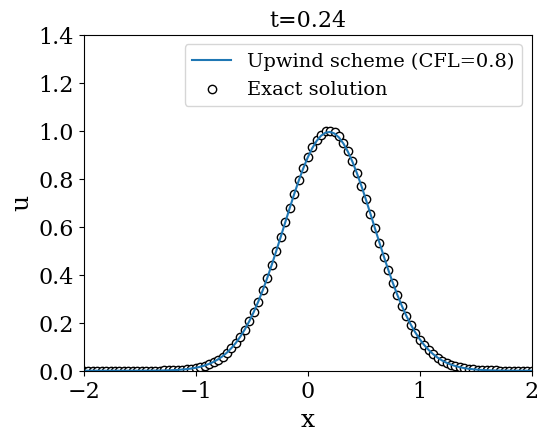

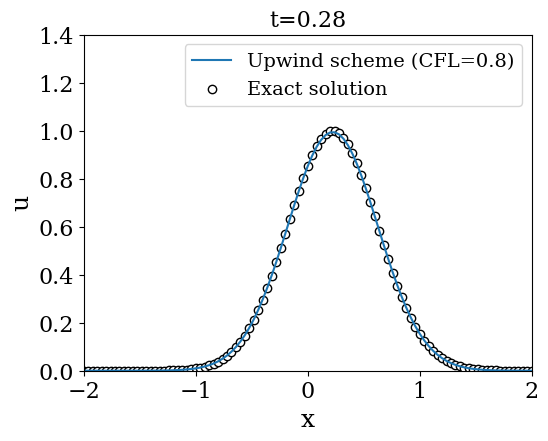

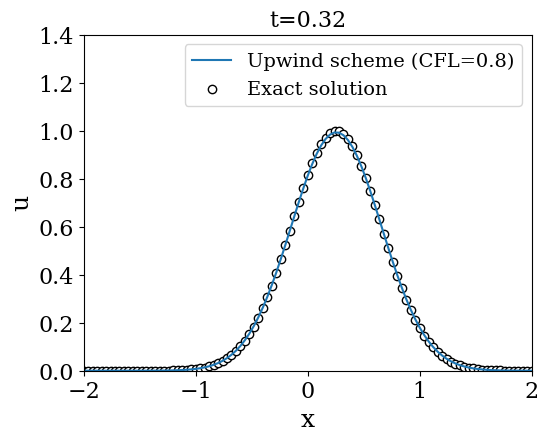

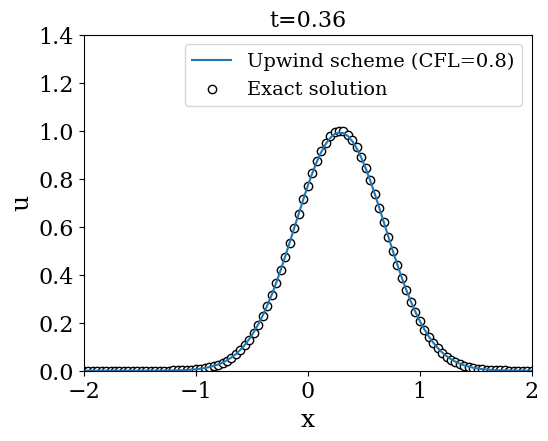

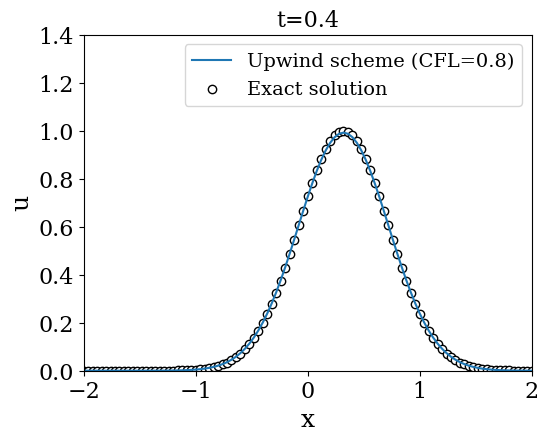

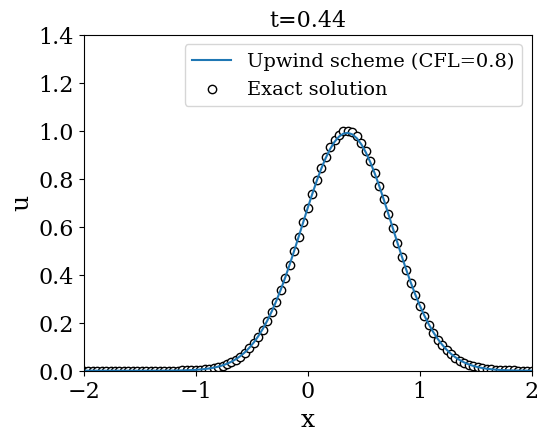

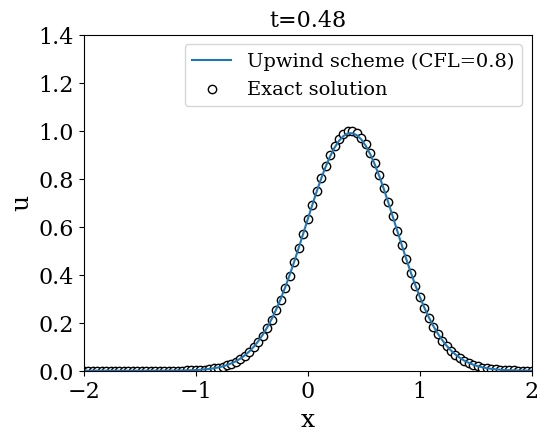

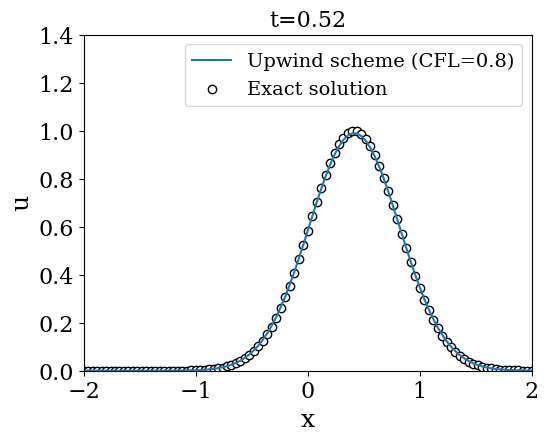

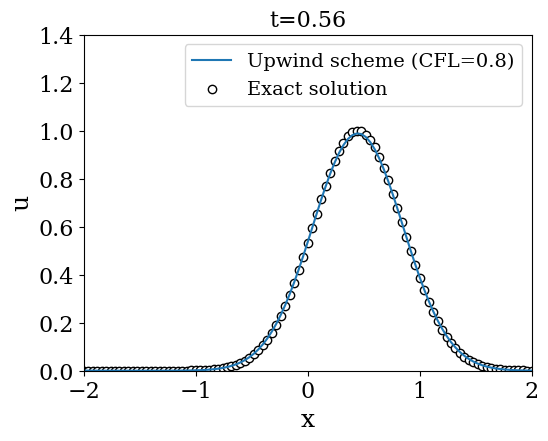

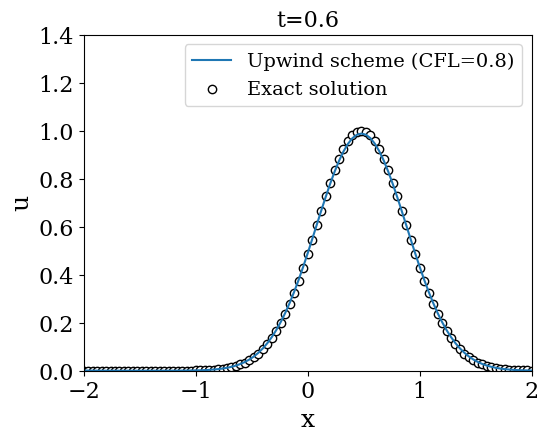

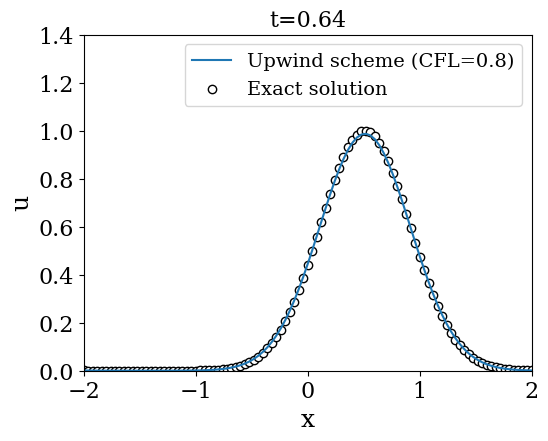

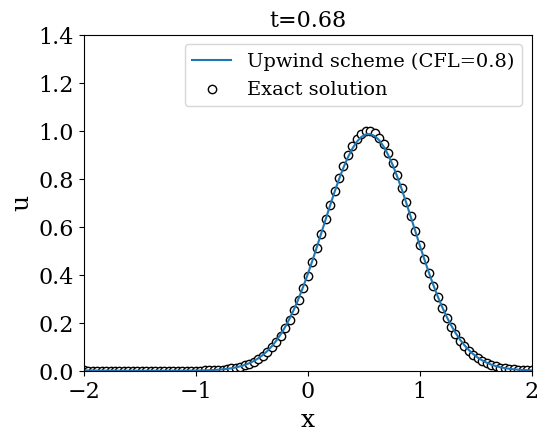

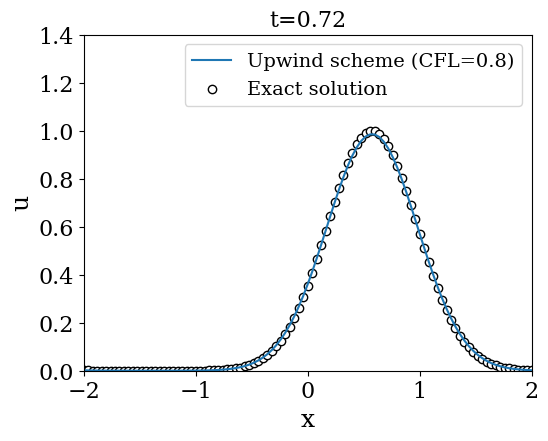

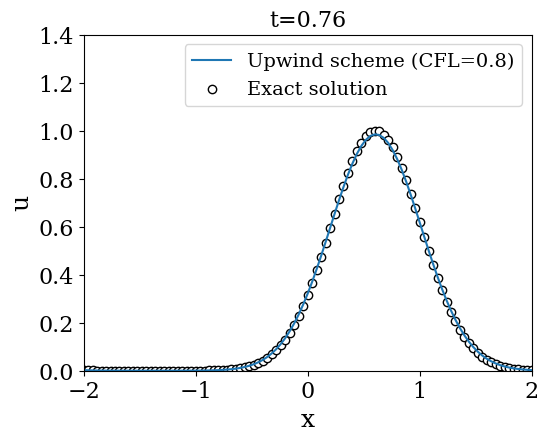

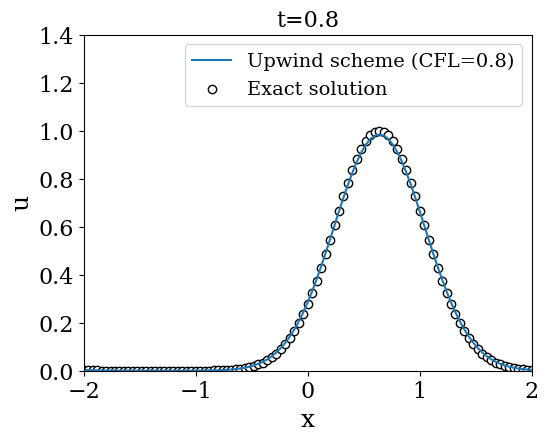

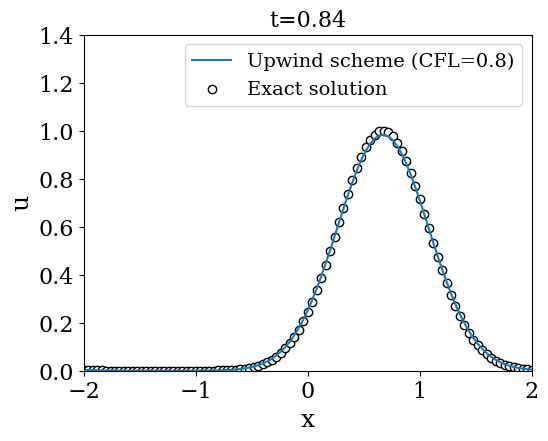

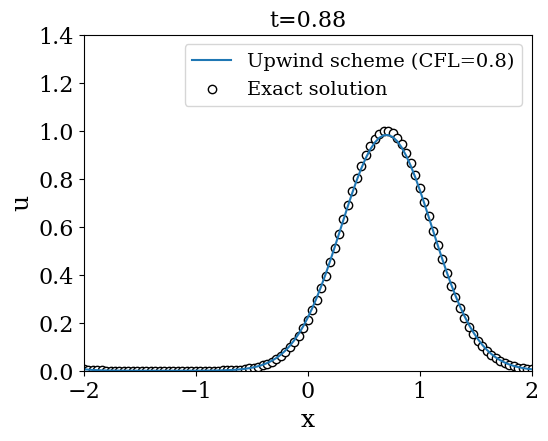

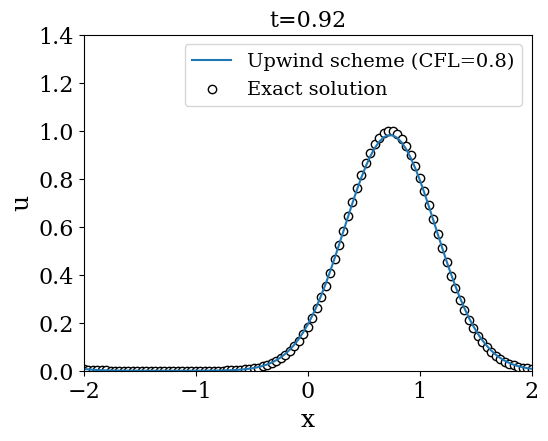

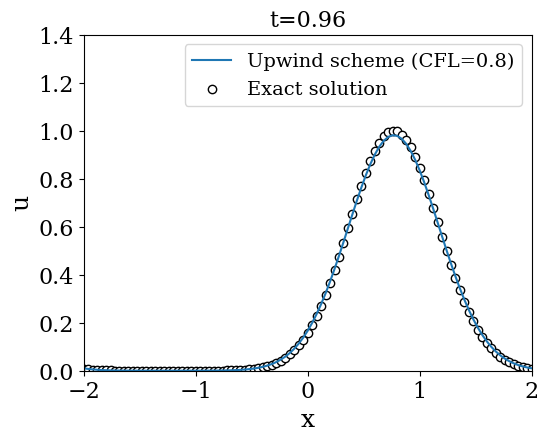

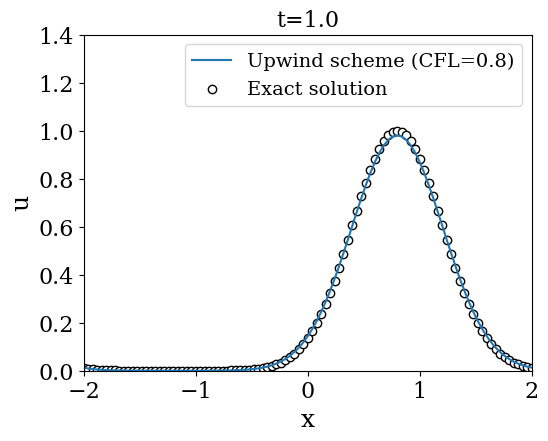

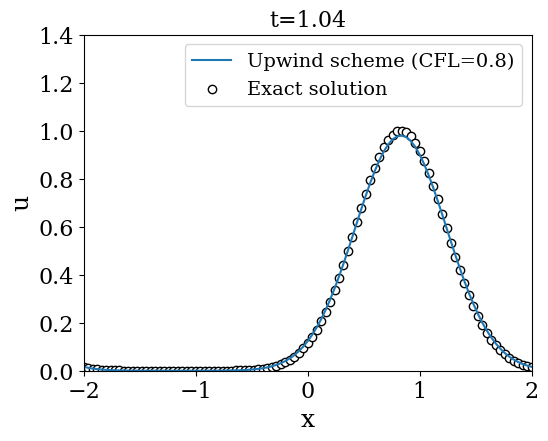

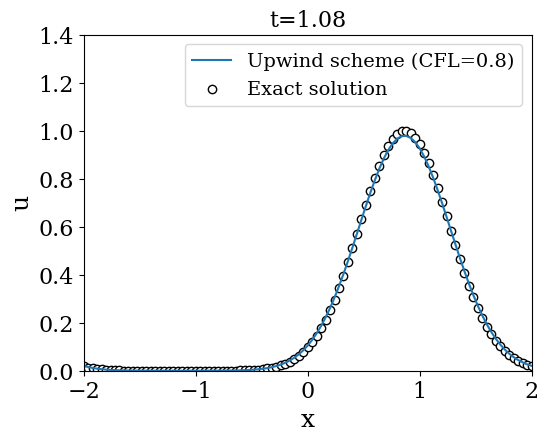

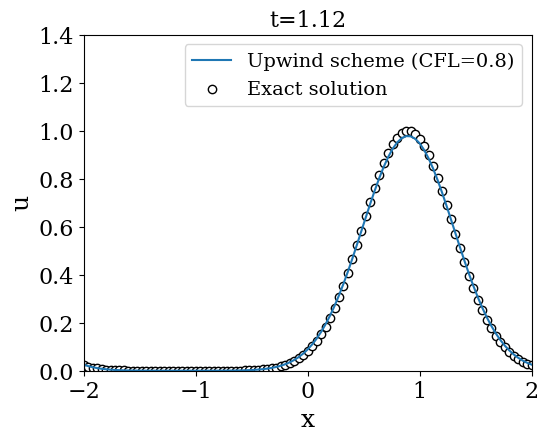

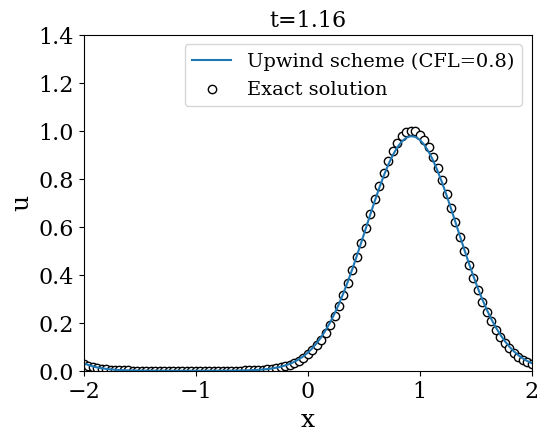

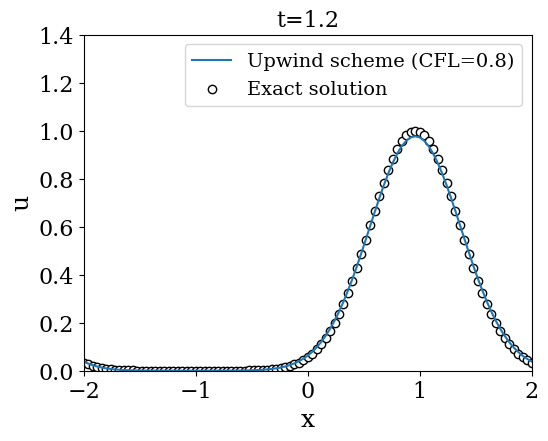

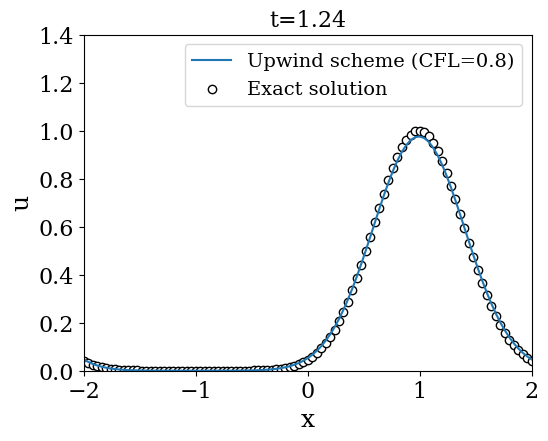

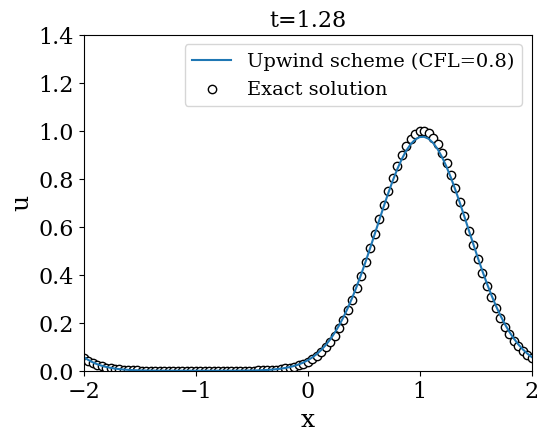

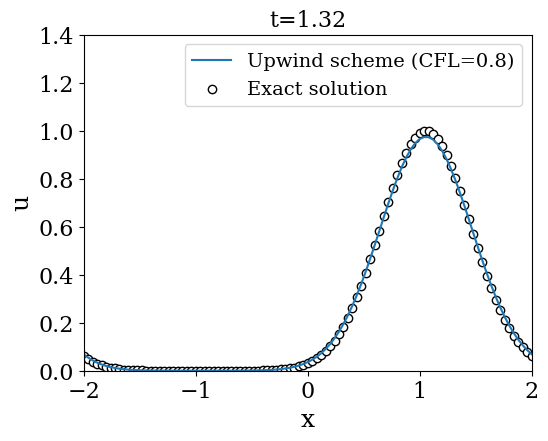

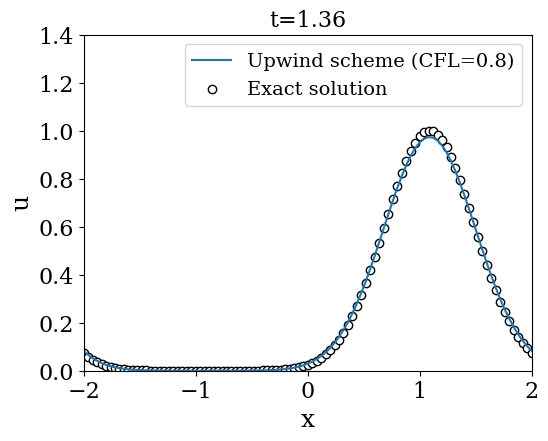

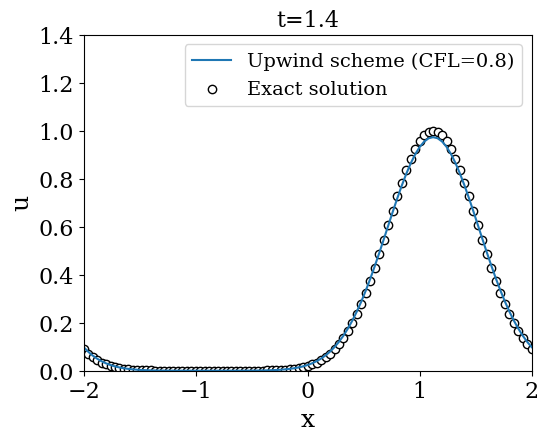

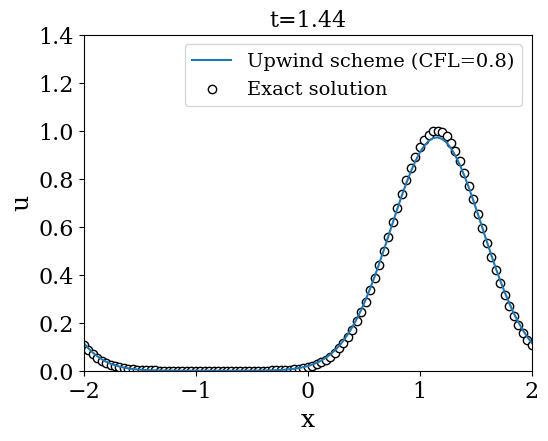

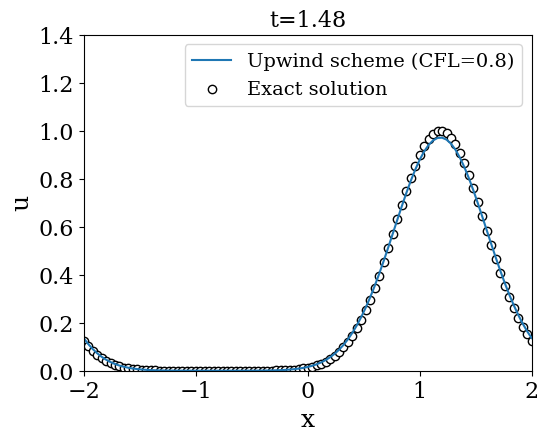

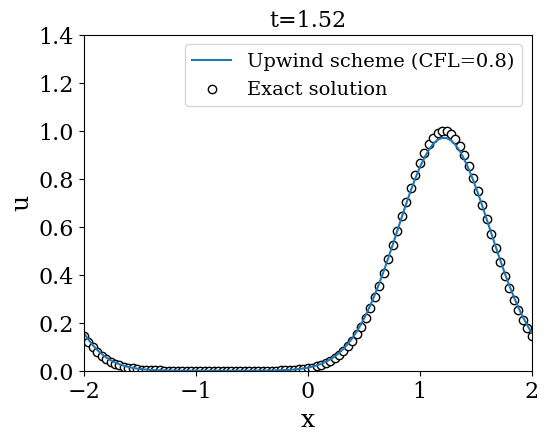

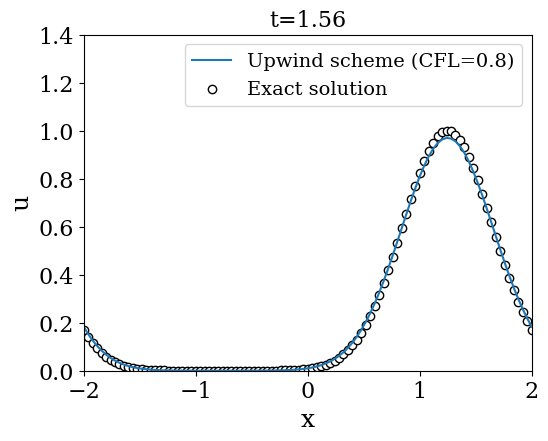

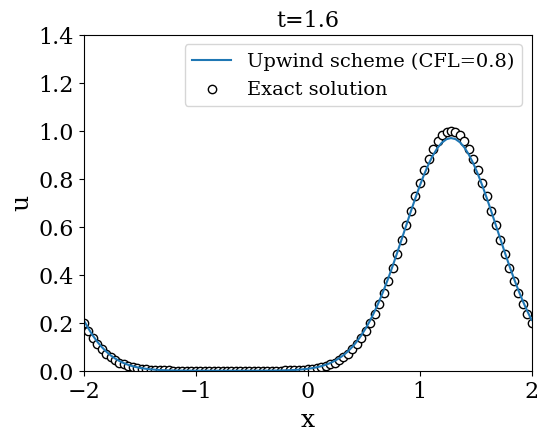

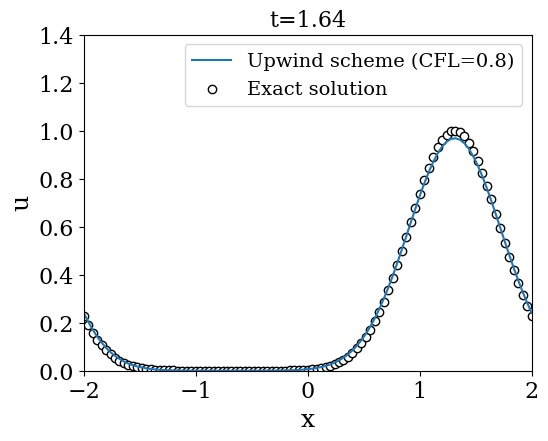

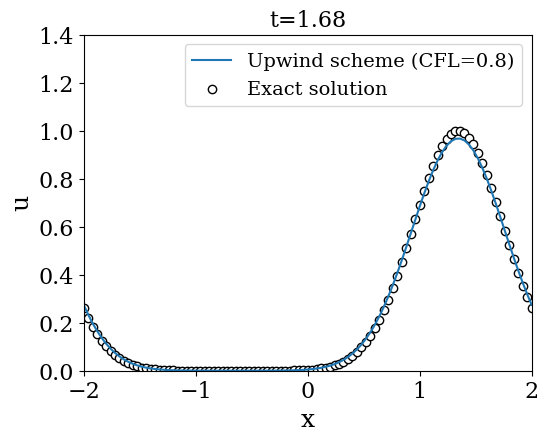

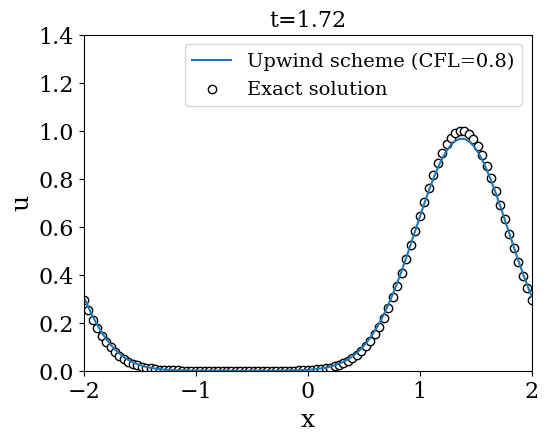

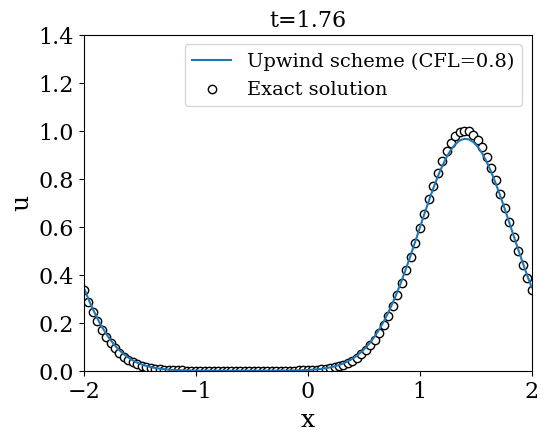

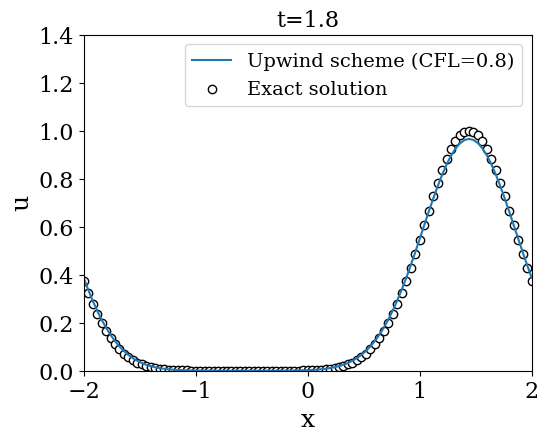

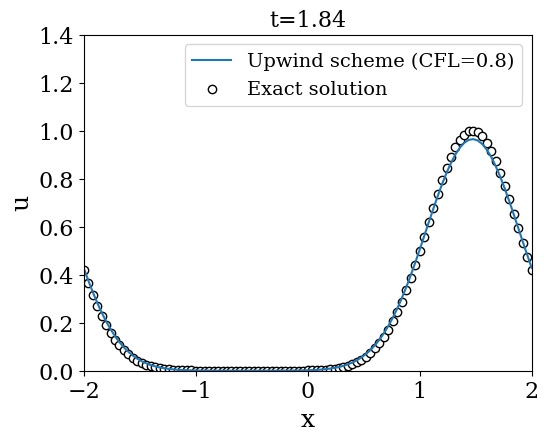

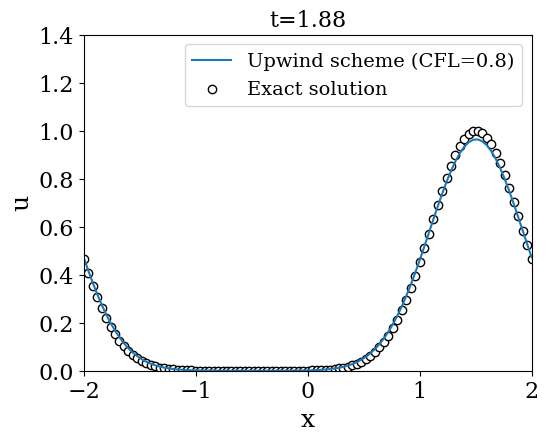

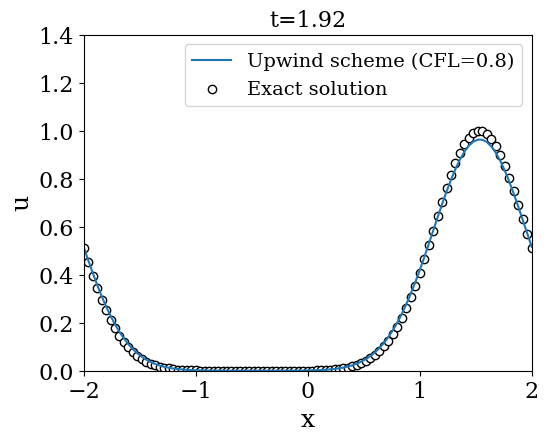

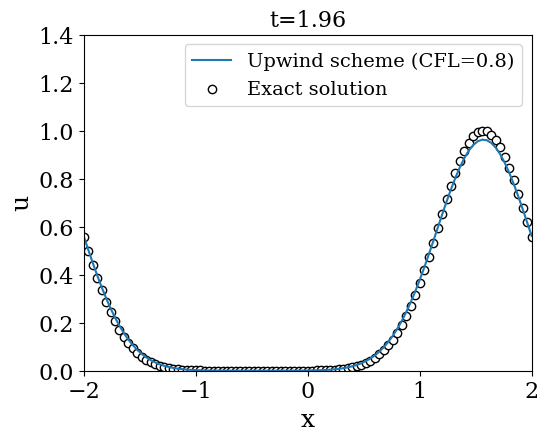

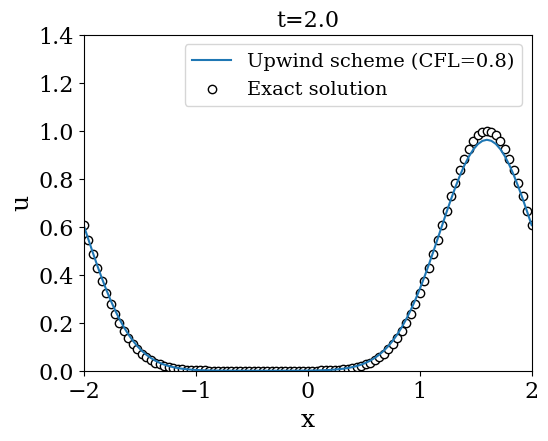

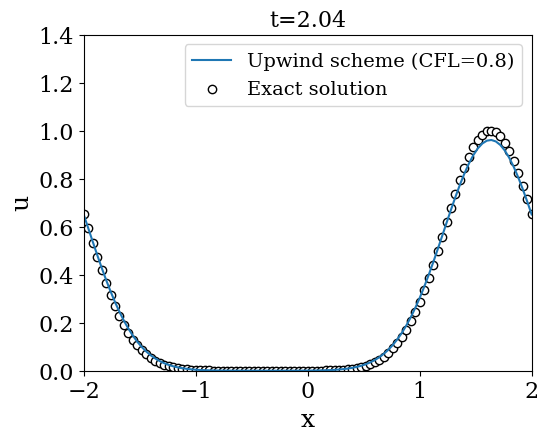

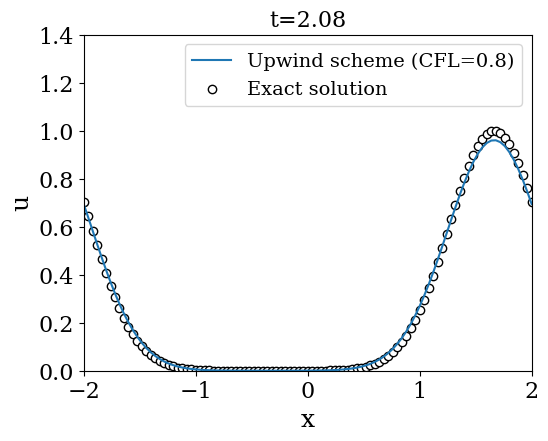

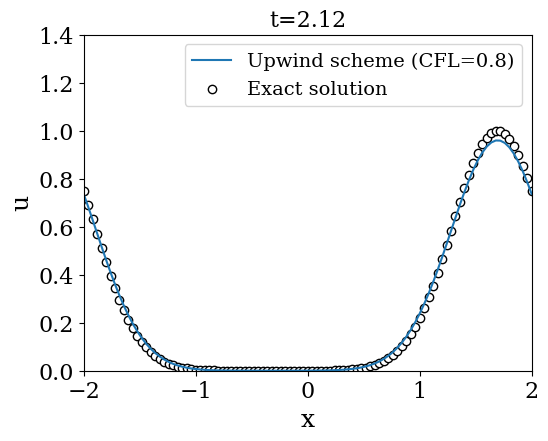

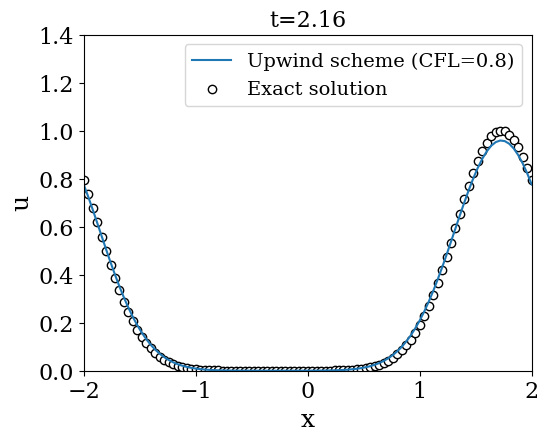

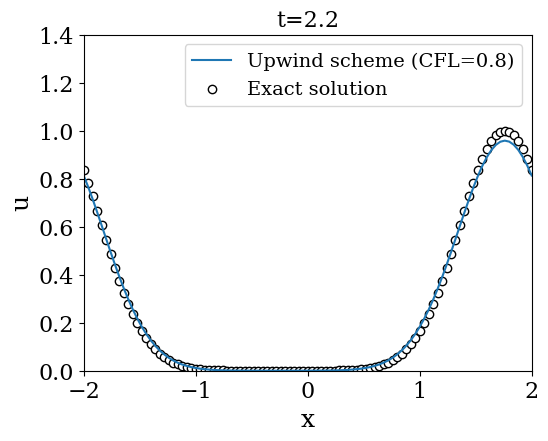

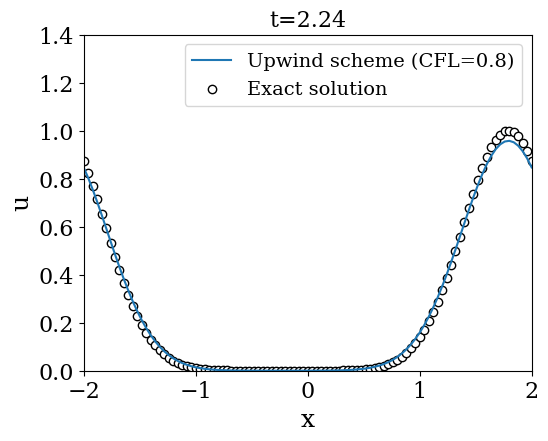

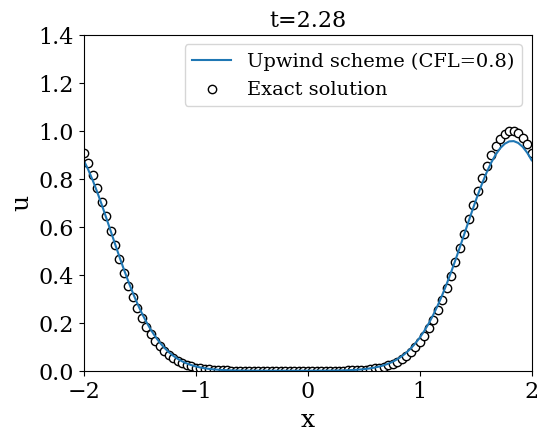

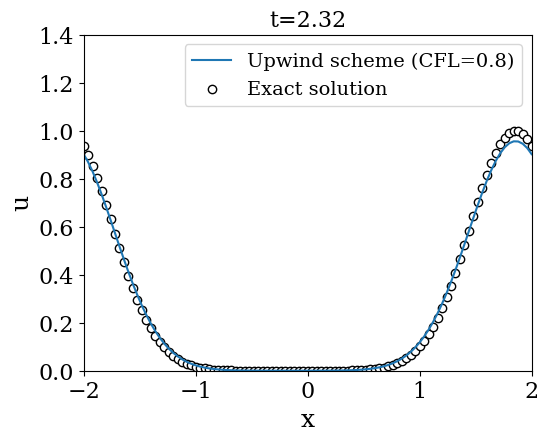

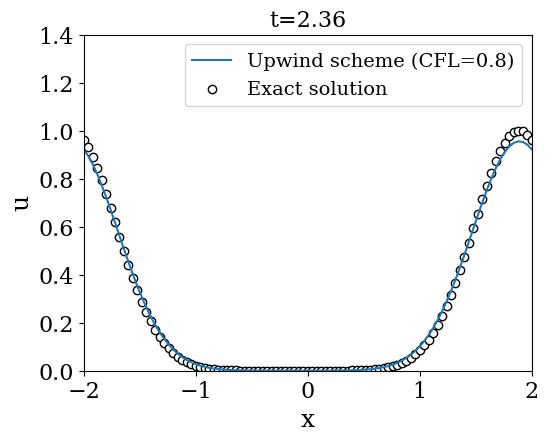

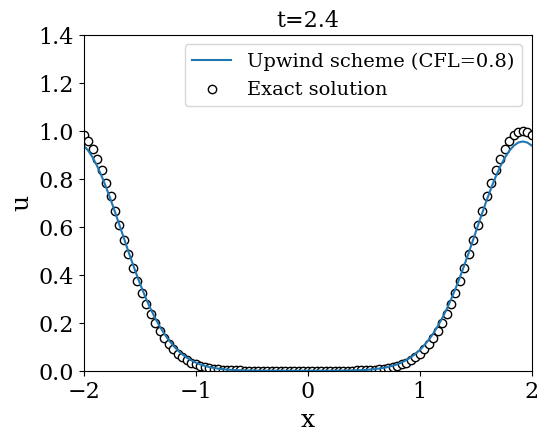

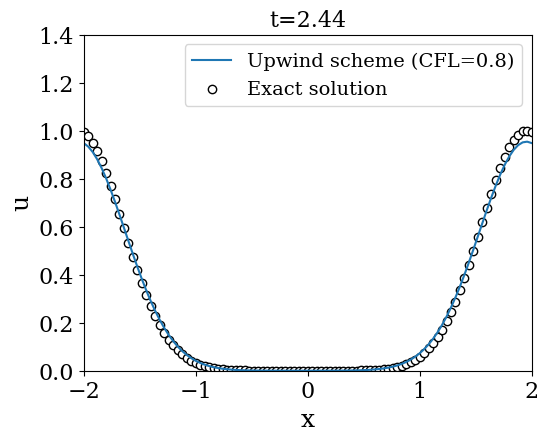

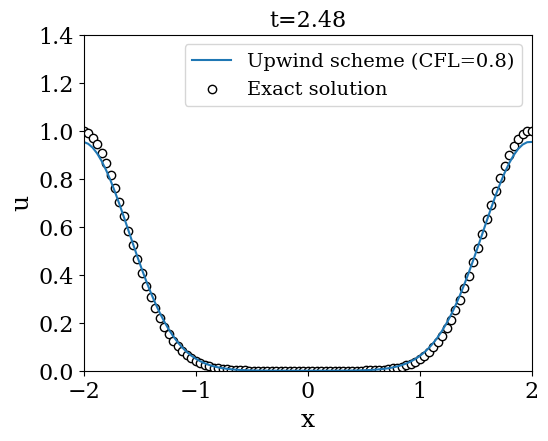

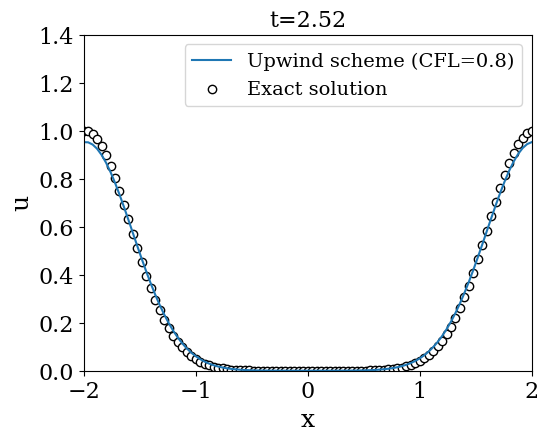

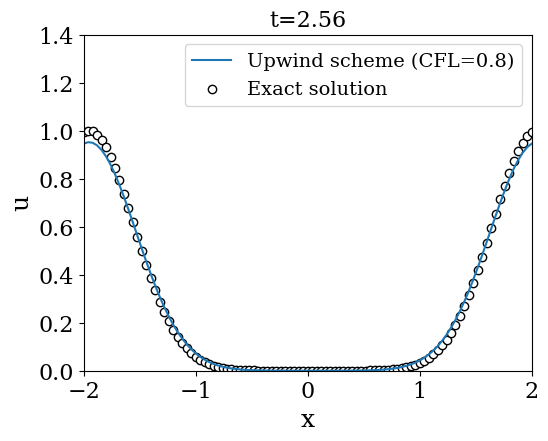

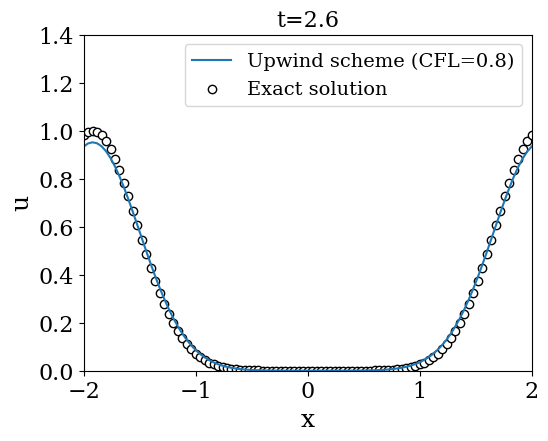

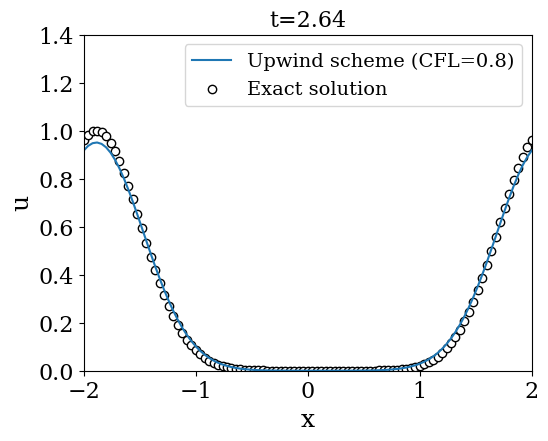

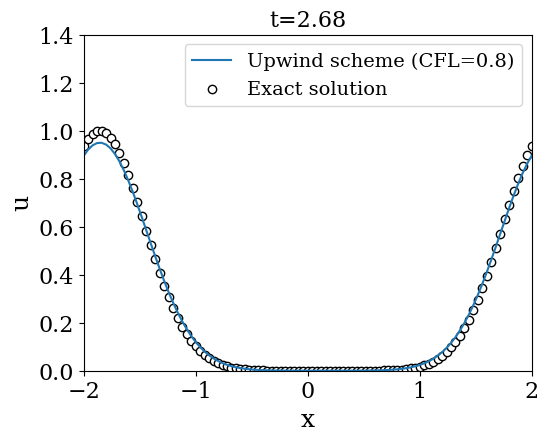

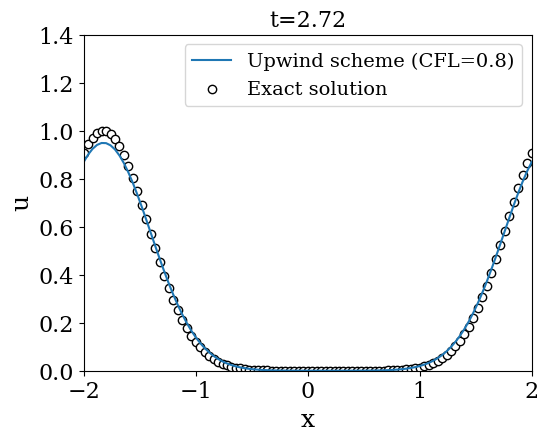

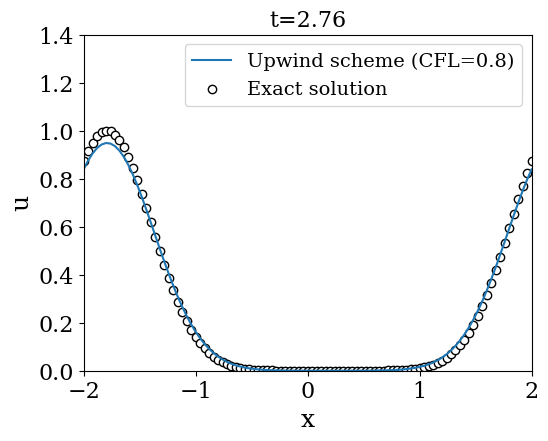

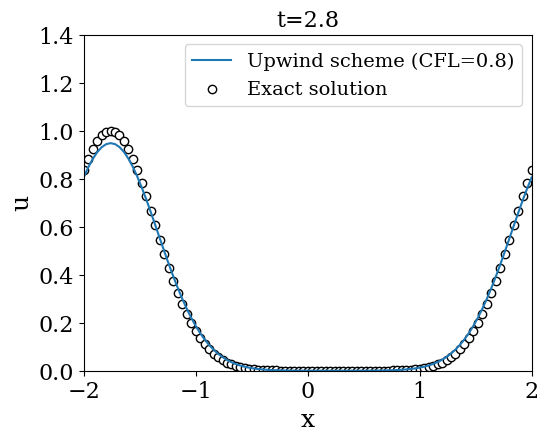

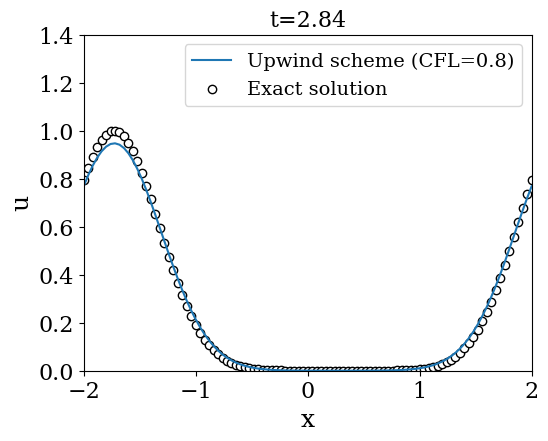

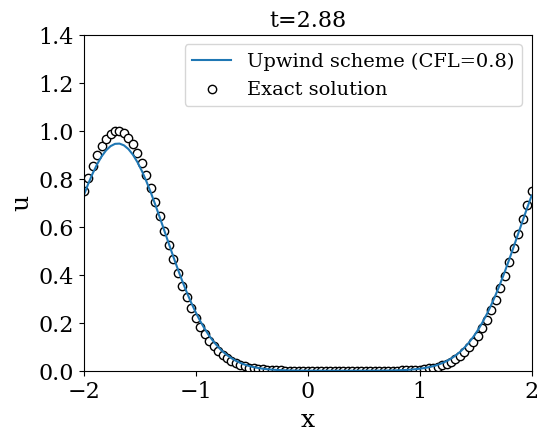

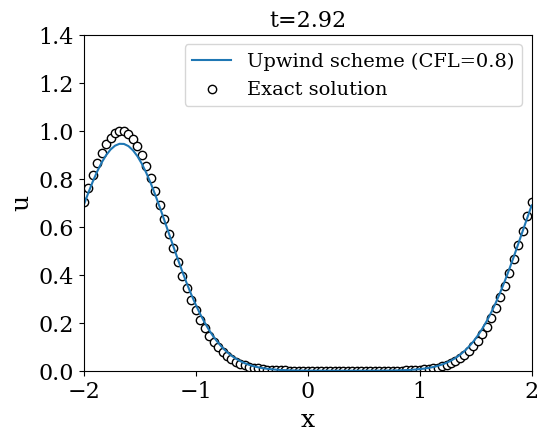

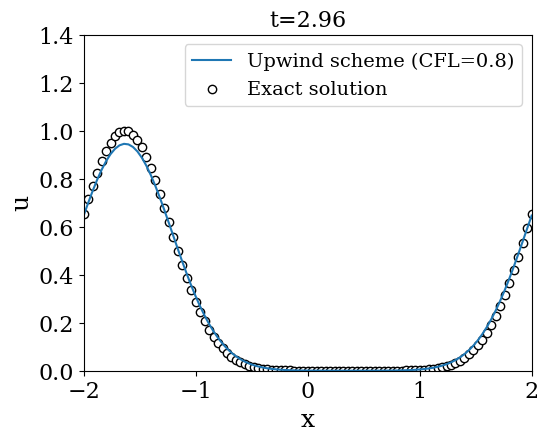

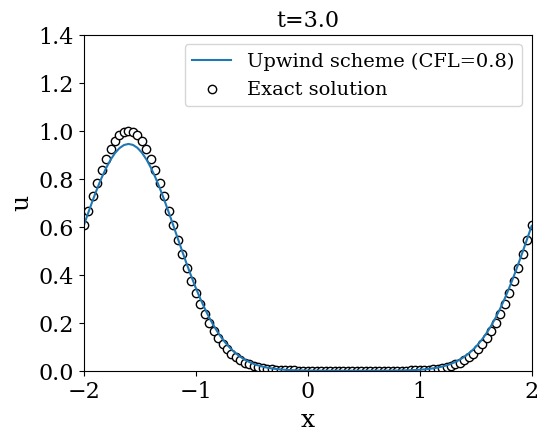

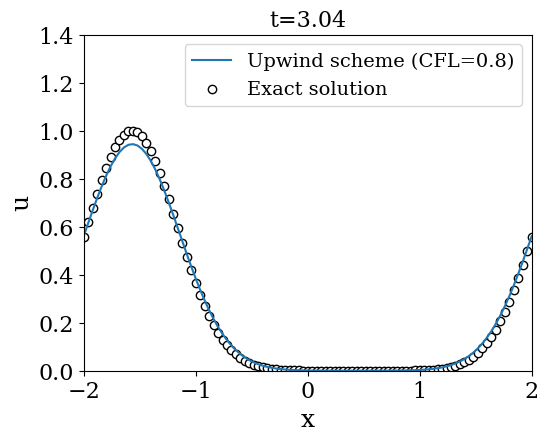

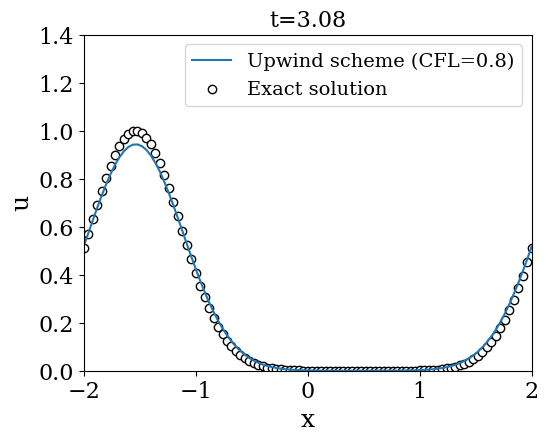

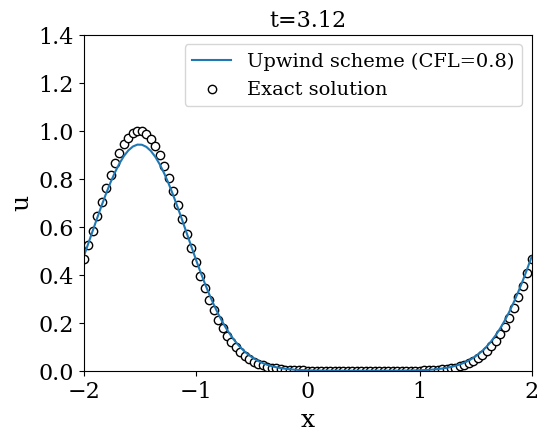

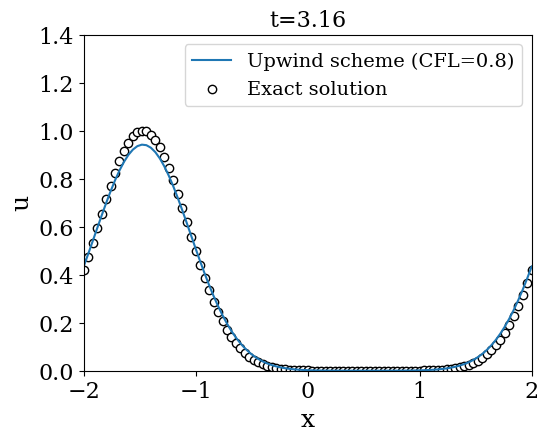

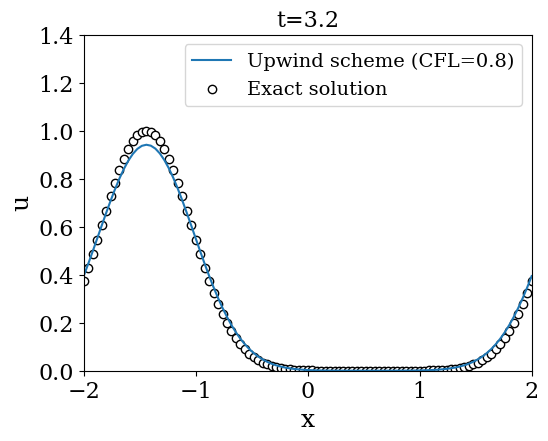

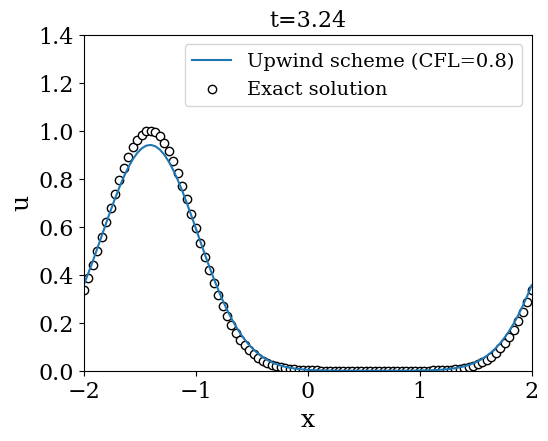

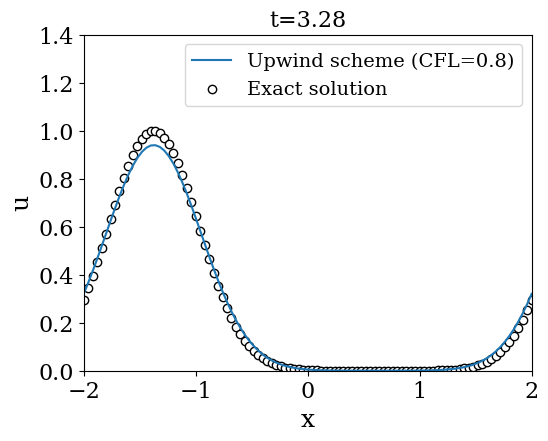

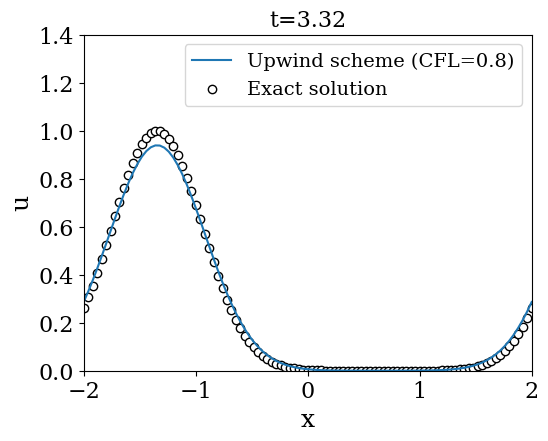

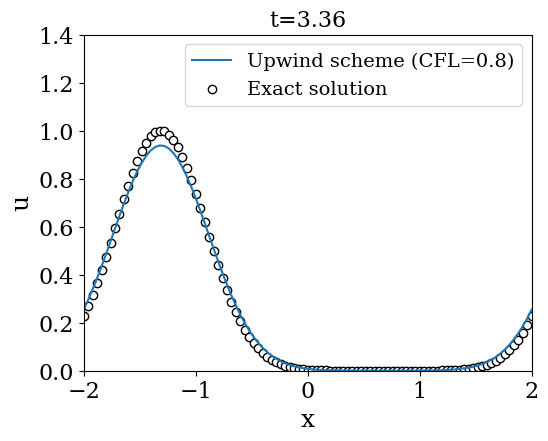

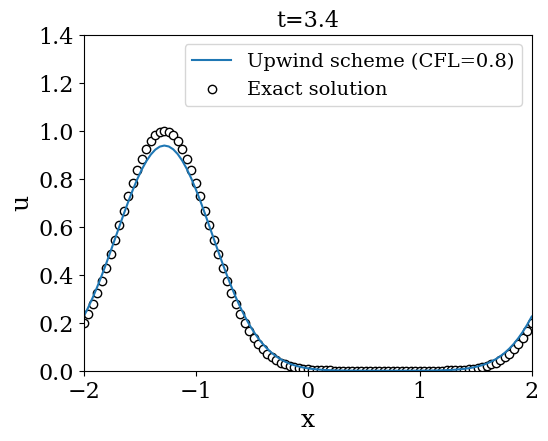

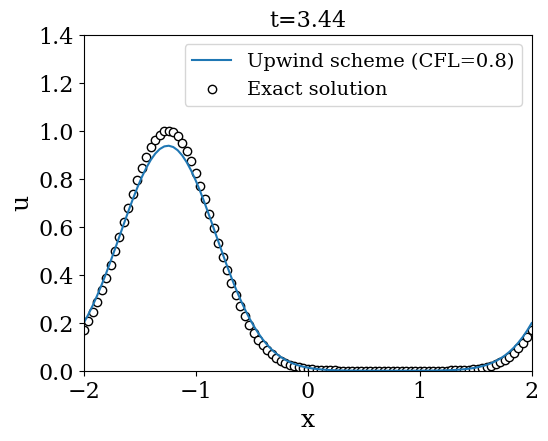

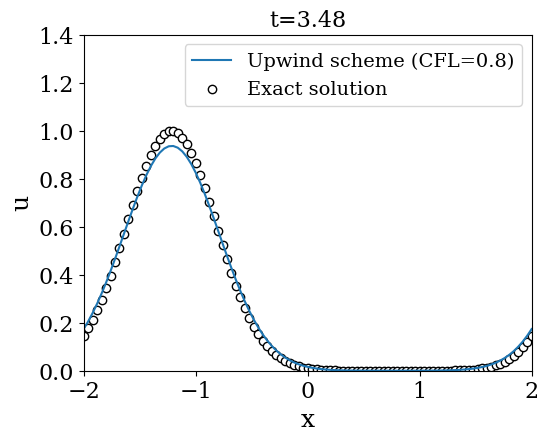

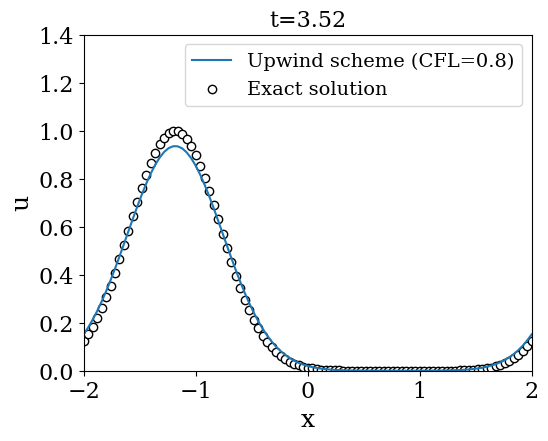

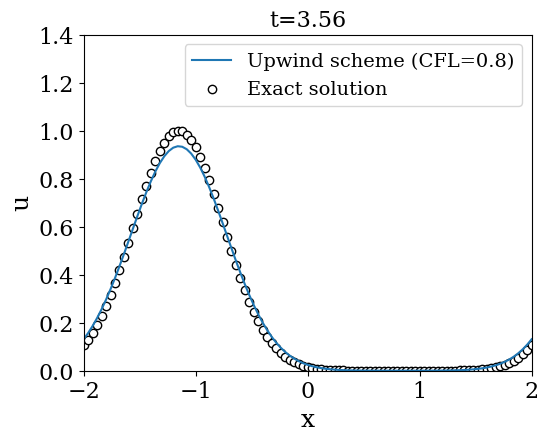

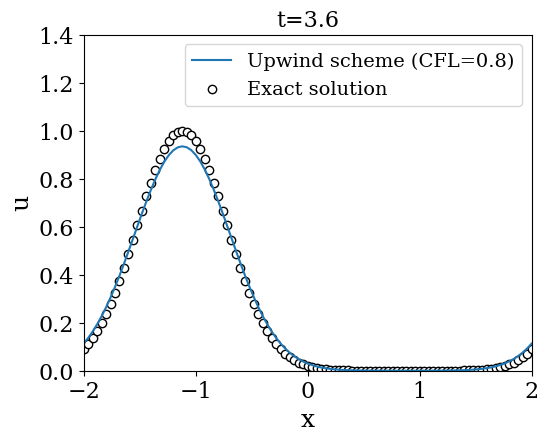

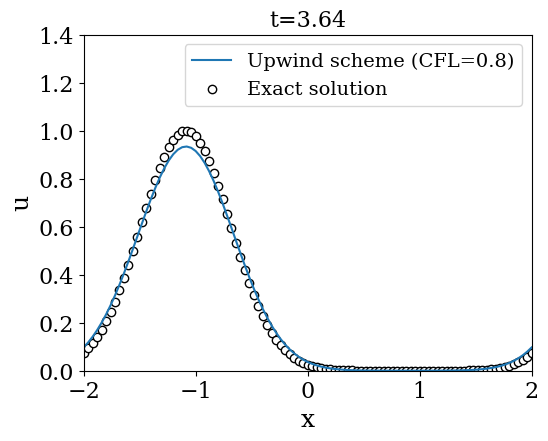

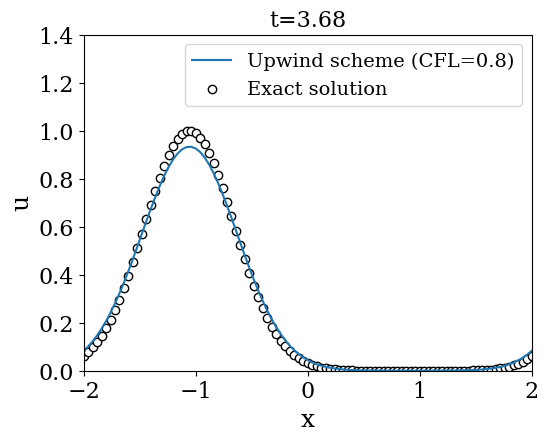

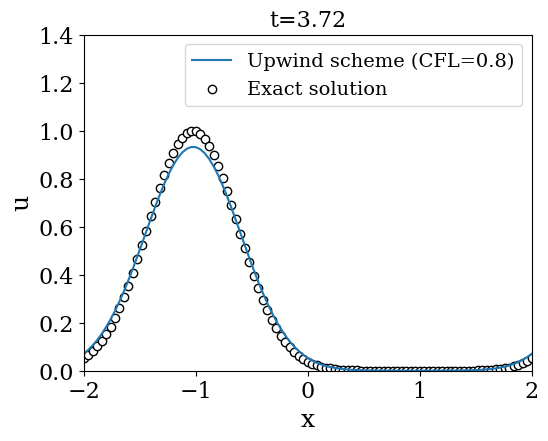

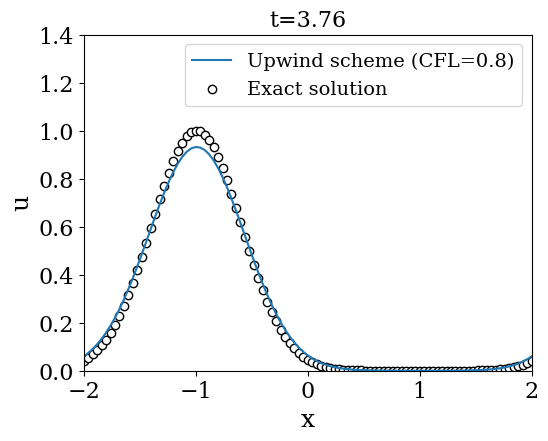

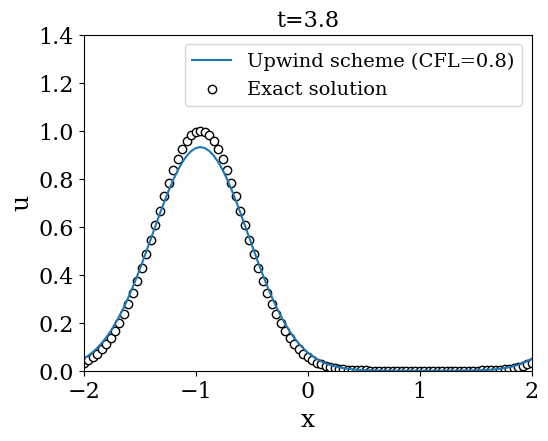

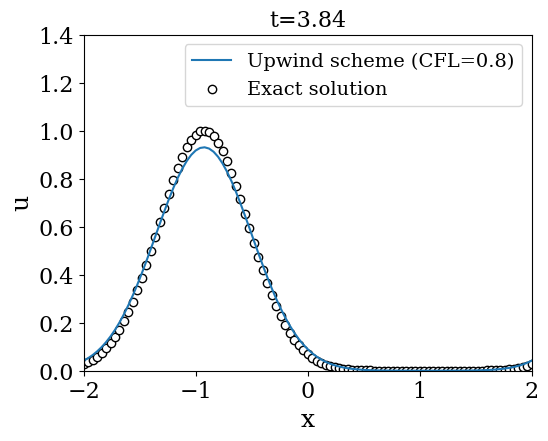

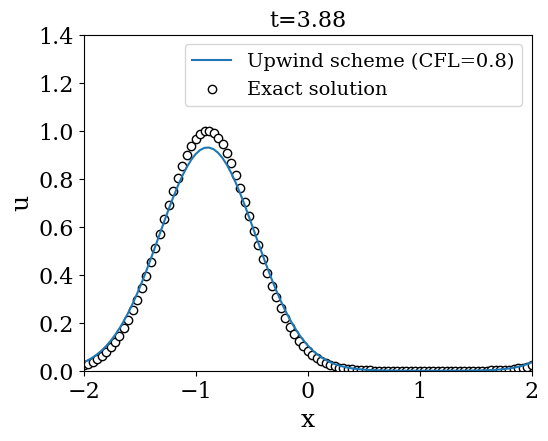

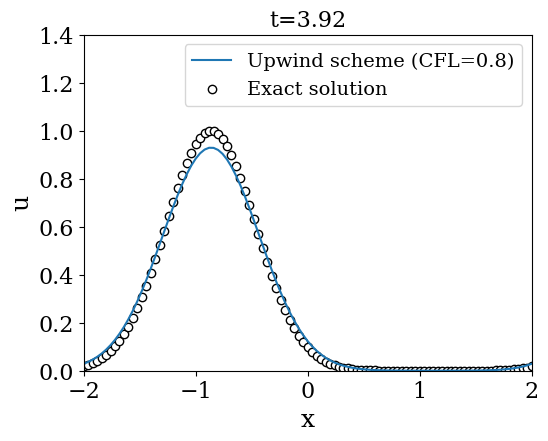

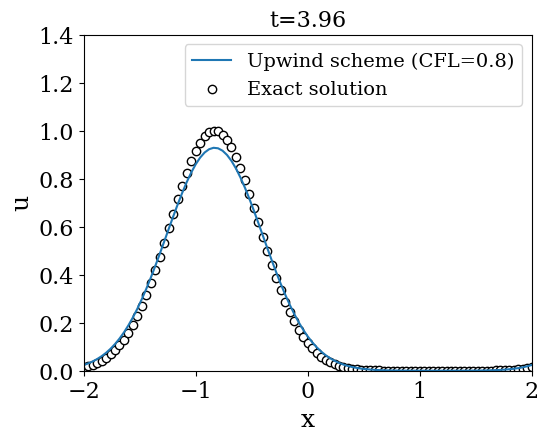

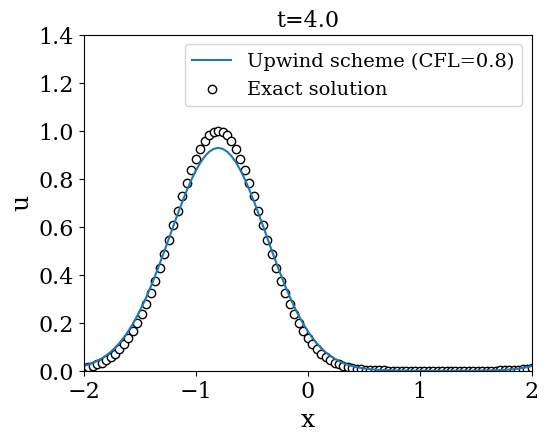

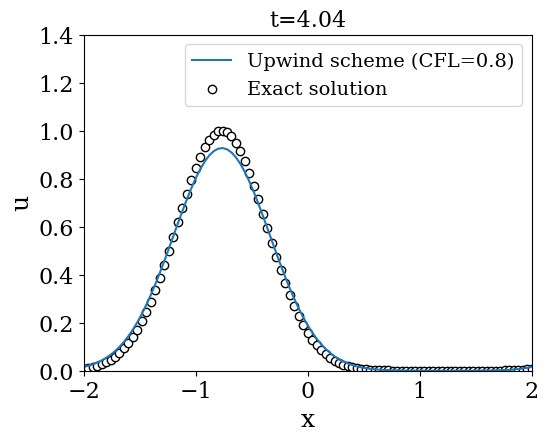

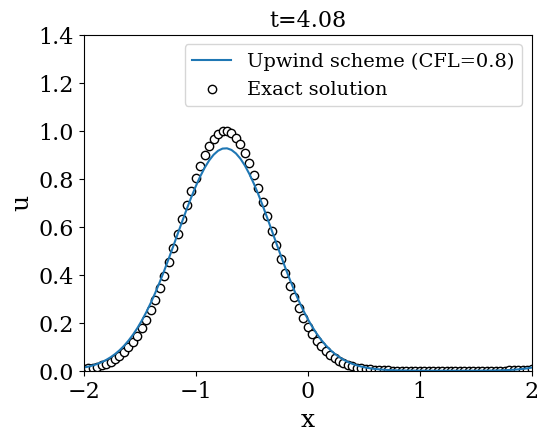

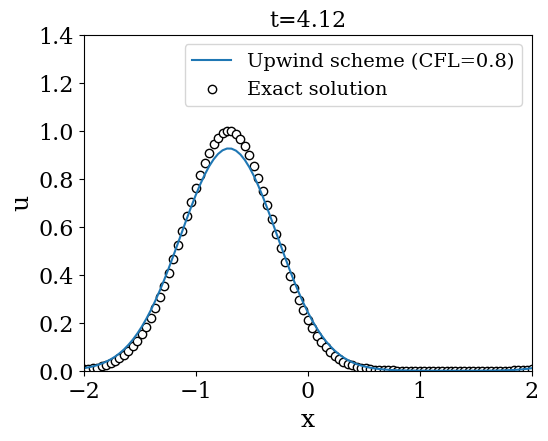

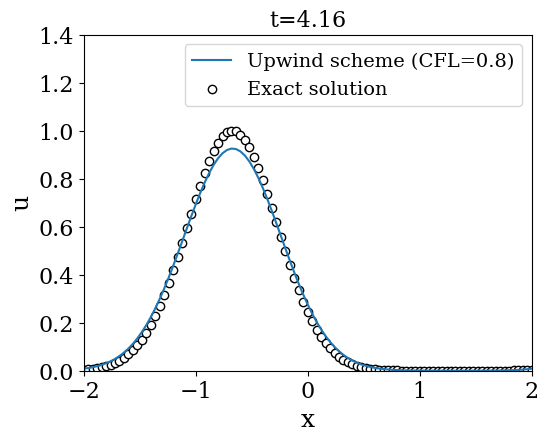

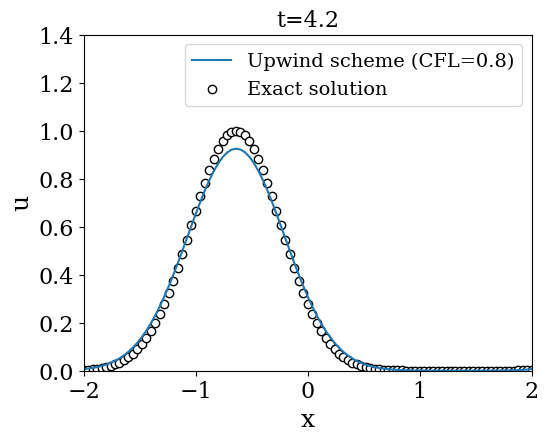

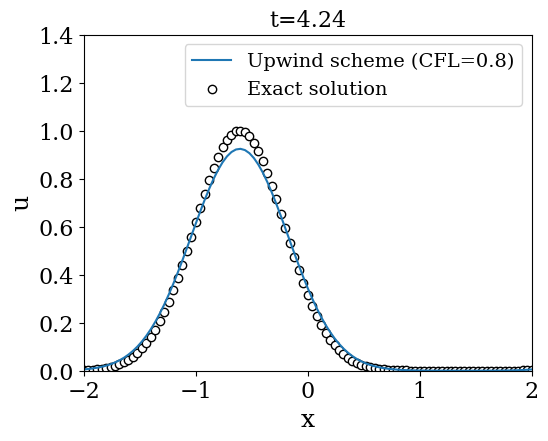

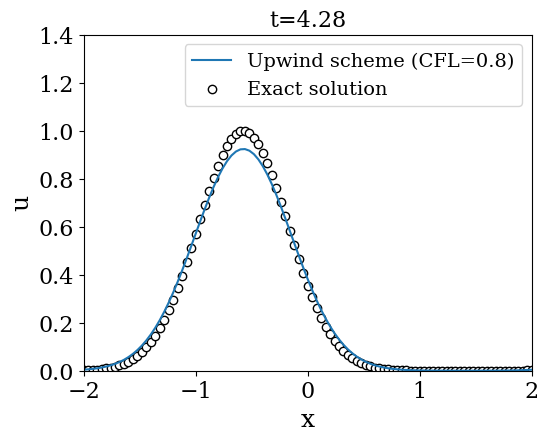

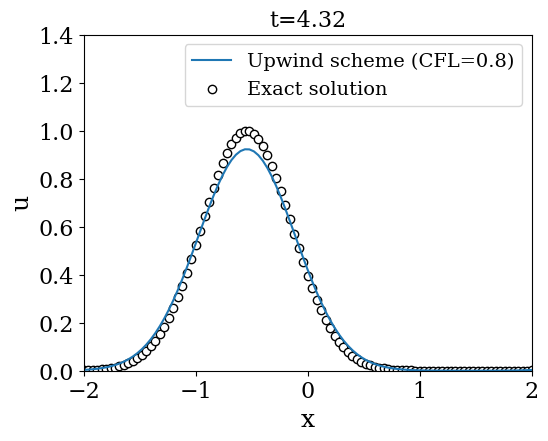

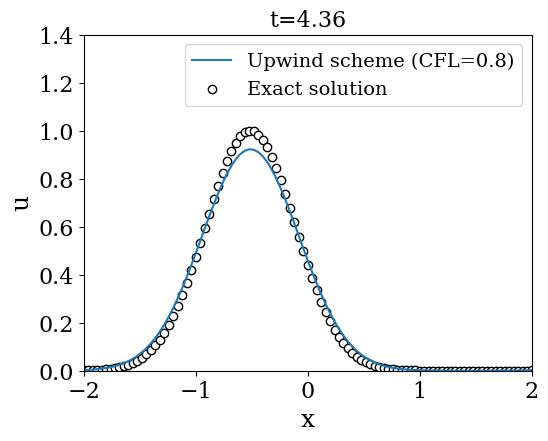

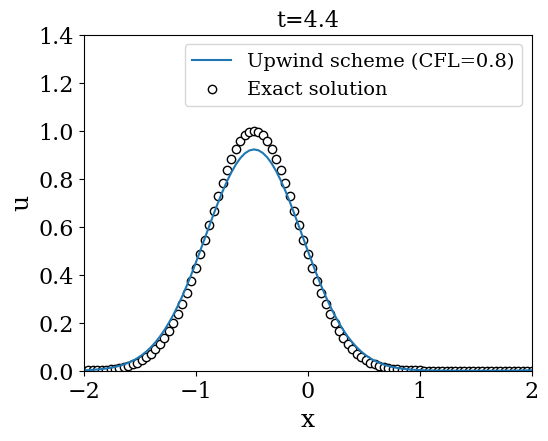

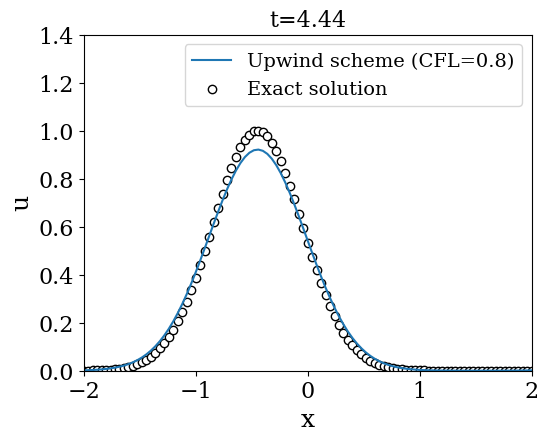

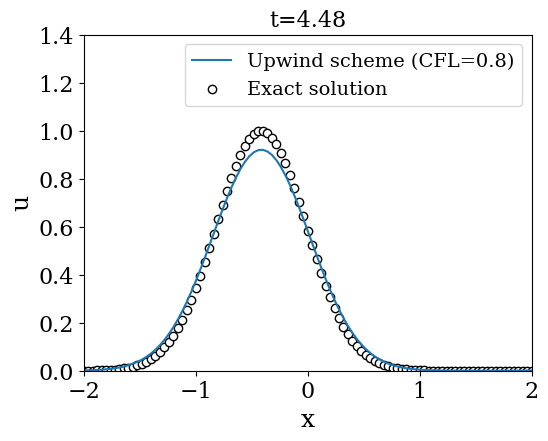

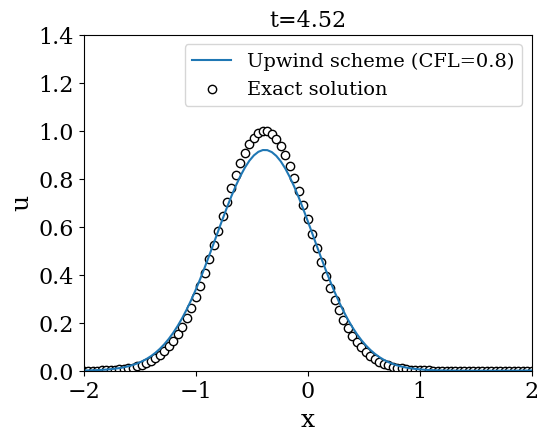

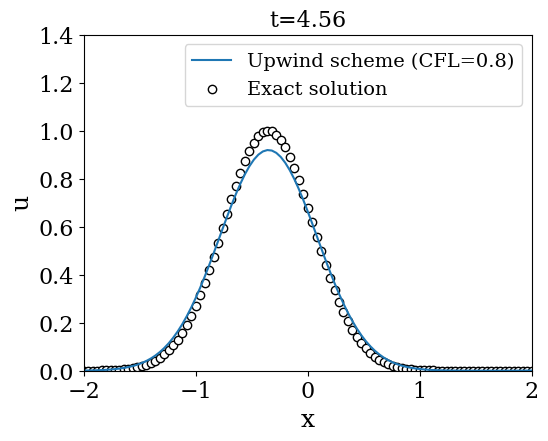

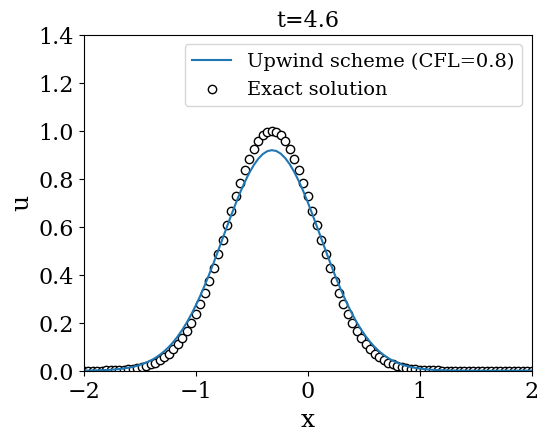

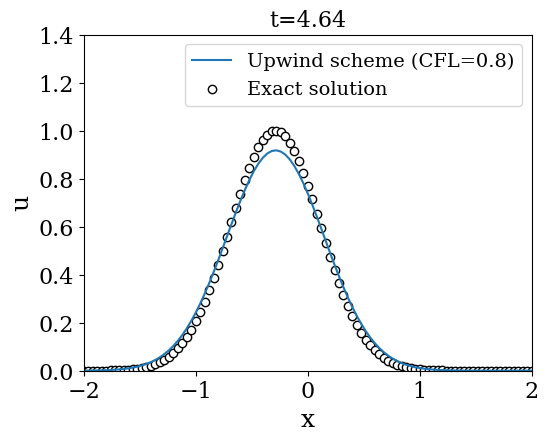

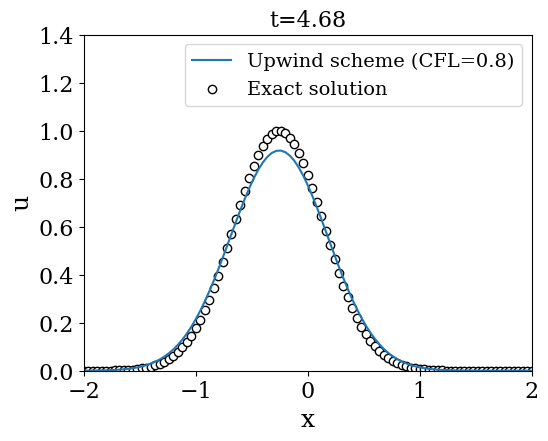

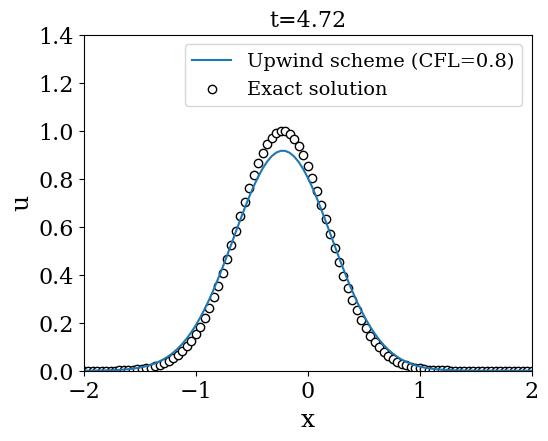

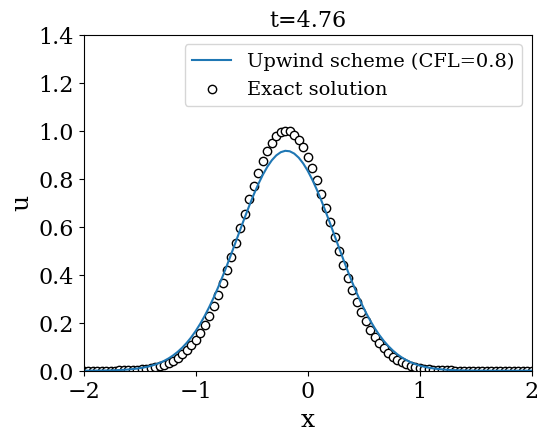

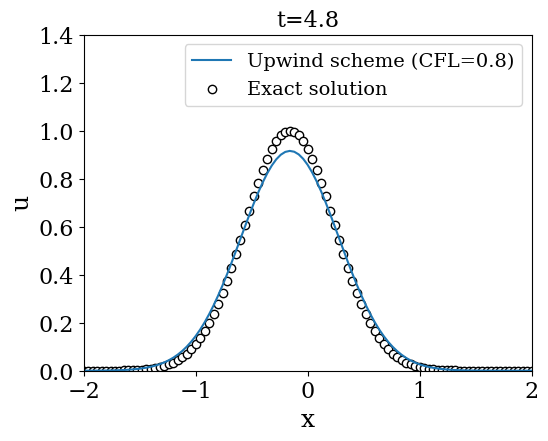

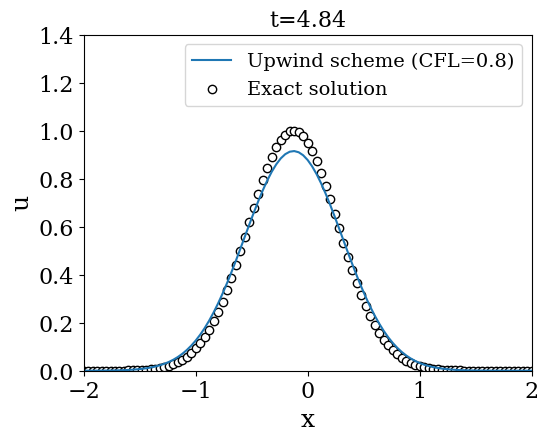

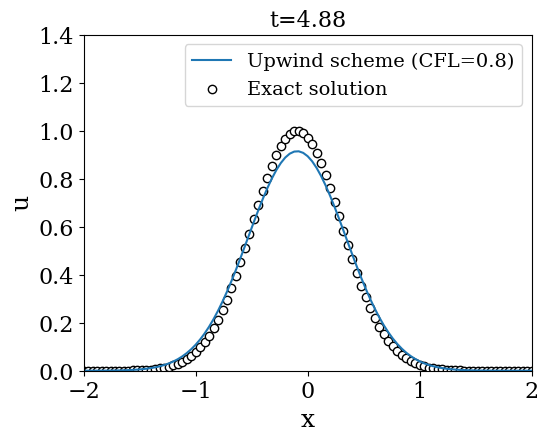

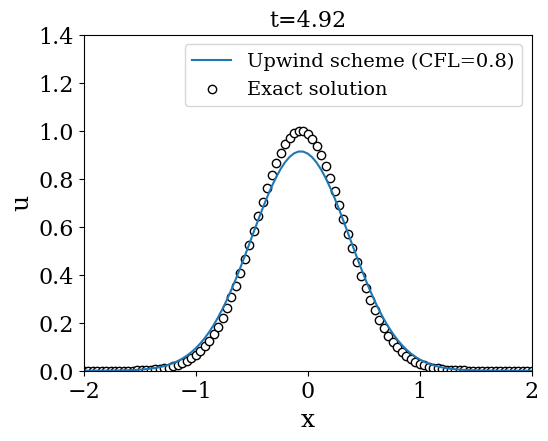

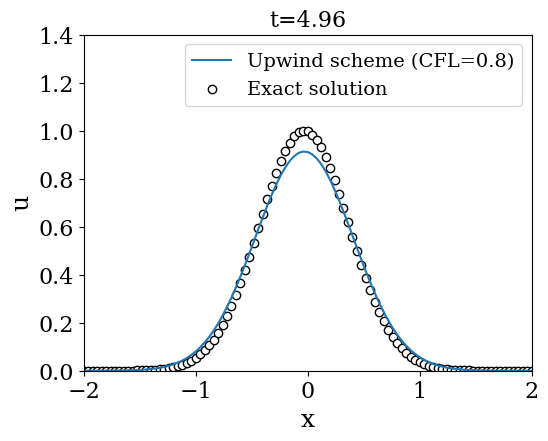

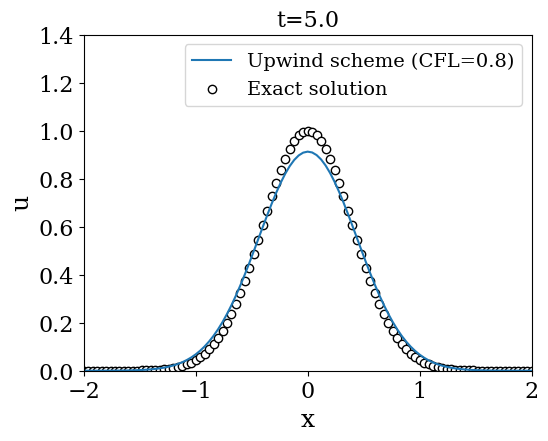

In [1]:
#! /usr/bin/env python
# -*- coding:utf-8 -*-

################################################################
#
# Class 01: 1D-Advection problem
# Objective: Solve equation using the upwind scheme
# Author: P. S. Volpiani
# Date: 01/08/2020
#
################################################################

#===============================================================
# Some libraries
#===============================================================

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':14})

#===============================================================
# Some definitions
#===============================================================

Nx = 101;                         # Number of grid points
xmax = 2.;                        # Domain limit to the right
xmin = -2.;                       # Domain limit to the left
dx = (xmax-xmin)/(Nx-1)           # Mesh size
x = np.linspace(xmin,xmax,Nx)     # Discretized mesh
dt = 0.04                         # Time step
t_end = 5.                        # Final time
Nt = int(t_end/dt)                # Number of iterations
t = np.linspace(0.,t_end,Nt+1)    # Time vector
c = 0.8                           # Advection speed
CFL = c*dt/dx                     # CFL number
U = np.zeros((Nt+1,Nx))           # u^n_i
U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution
Uex = U[0,:]                      # Exact solution


#===============================================================
# Solve equation using the upwind scheme
#===============================================================
for n in range (0,Nt):

  if (c>0.):
      for i in range (1,Nx):
          U[n+1,i] = U[n,i] - CFL*(U[n,i]-U[n,i-1]);
      U[n+1,0] = U[n+1,Nx-1];
  else:
      for i in range (0,Nx-1):
          U[n+1,i] = U[n,i] - CFL*(U[n,i+1]-U[n,i]);
      U[n+1,Nx-1] = U[n,0];
      
#===============================================================
# Compute exact solution
#===============================================================
  d = c*(n+1)*dt
  Uex = np.exp(-0.5*(np.mod(x-d+xmax,4)-xmax)**2/0.4**2)
  errL1 = U - Uex
  errL2 = np.linalg.norm(errL1)
  
#===============================================================
# Plot solution
#===============================================================
  if (n==0): fig, ax = plt.subplots(figsize=(5.5,4))
  plt.clf()
  plt.plot(x,U[n+1,:])
  plt.scatter(x,Uex, marker='o', facecolors='white', color='k')
  plt.gca().legend(('Upwind scheme (CFL='+str(CFL)+')','Exact solution'))
  plt.axis([xmin, xmax, 0, 1.4])
  plt.title('t='+str(round(dt*(n+1),3)),fontsize=16)
  plt.xlabel('x',fontsize=18)
  plt.ylabel('u',fontsize=18)
  plt.subplots_adjust(left=0.2)
  plt.subplots_adjust(bottom=0.18)
  plt.draw()
  plt.pause(0.001)

plt.show()
#fig.savefig("figure.pdf", dpi=300)
#print 'Error L2 = ',errL2


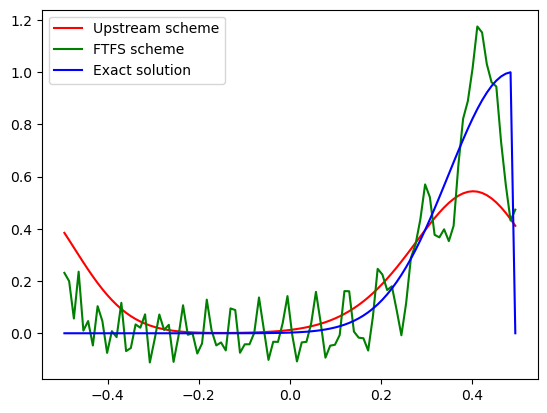

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1 # m/s
Lx = 1 # m
Nx = 96
dx = Lx/Nx
mu = c*dx/0.5 # c*dt/dx
dt = mu*dx/c

# Initial condition
x = np.linspace(-Lx/2 + dx/2, Lx/2 - dx/2, Nx)
f = np.exp(-((x-Lx/2)**2)/(0.2**2))

# Upstream scheme
phi_up = np.zeros((Nx, int(Lx/(c*dt))))
phi_up[:, 0] = f
for n in range(1, int(Lx/(c*dt))):
    for j in range(Nx):
        phi_up[j, n] = phi_up[j, n-1] - mu*(phi_up[j, n-1]-phi_up[(j-1)%Nx, n-1])

# Forward in time, centered in space scheme
phi_ftcs = np.zeros((Nx, int(Lx/(c*dt))))
phi_ftcs[:, 0] = f
for n in range(1, int(Lx/(c*dt))):
    for j in range(Nx):
        phi_ftcs[j, n] = phi_ftcs[j, n-1] - mu/2*(phi_ftcs[(j+1)%Nx, n-1]-phi_ftcs[(j-1)%Nx, n-1])

# Exact solution
phi_exact = np.zeros((Nx, int(Lx/(c*dt))))
phi_exact[:, 0] = f
for n in range(1, int(Lx/(c*dt))):
    for j in range(Nx):
        phi_exact[j, n] = phi_exact[(j-n)%Nx, 0]

# Plot
plt.plot(x, phi_up[:, -1], 'r', label='Upstream scheme')
plt.plot(x, phi_ftcs[:, -1], 'g', label='FTFS scheme')
plt.plot(x, phi_exact[:, -1], 'b', label='Exact solution')
plt.legend()
plt.show()


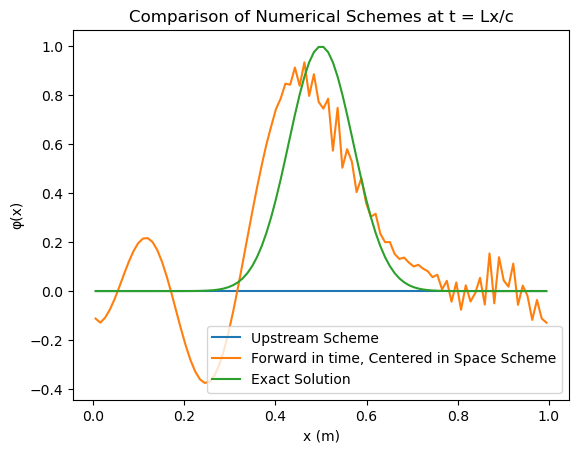

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1 # m/s
a = 0.1 # m
Lx = 1 # m
Nx = 96 # grid points
dx = Lx/Nx # grid spacing
dt = dx/c # time step
mu = c*dt/dx # Courant number

# Initial condition
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx) # staggered grid
phi0 = np.exp(-((x - Lx/2)**2)/a**2) # initial wave

# Upstream scheme
phi_up = np.zeros(Nx) # solution array
phi_up[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    for j in range(1, Nx-1): # space loop
        phi_up[j] = phi_up[j] - mu*(phi_up[j] - phi_up[j-1])
    phi_up[0] = phi_up[Nx-2] # periodic boundary condition
    phi_up[Nx-1] = phi_up[1]

# Forward in time, centered in space scheme
phi_fc = np.zeros(Nx) # solution array
phi_fc[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    for j in range(1, Nx-1): # space loop
        phi_fc[j] = phi_fc[j] - 0.5*mu*(phi_fc[j+1] - phi_fc[j-1])
    phi_fc[0] = phi_fc[Nx-2] # periodic boundary condition
    phi_fc[Nx-1] = phi_fc[1]

# Exact solution
phi_ex = np.zeros(Nx) # solution array
phi_ex[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    phi_ex = np.roll(phi_ex, 1) # circular shift

# Plotting
plt.plot(x, phi_up, label='Upstream Scheme')
plt.plot(x, phi_fc, label='Forward in time, Centered in Space Scheme')
plt.plot(x, phi_ex, label='Exact Solution')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('φ(x)')
plt.title('Comparison of Numerical Schemes at t = Lx/c')
plt.show()


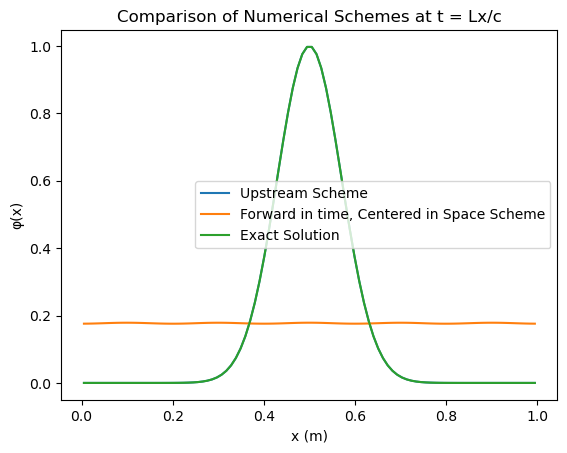

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.1 # m/s
a = 0.1 # m
Lx = 1 # m
Nx = 96 # grid points
dx = Lx/Nx # grid spacing
dt = dx/c # time step
mu = c*dt/dx # Courant number

# Initial condition
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx) # staggered grid
phi0 = np.exp(-((x - Lx/2)**2)/a**2) # initial wave

# Exact solution
phi_ex = np.zeros(Nx) # solution array
phi_ex[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    phi_ex = np.roll(phi_ex, 1) # circular shift

# Fourier Transform
phi_ex_fft = np.fft.fft(phi_ex) # FFT of exact solution
k = 2*np.pi*np.fft.fftfreq(Nx, dx) # wave numbers
exp_kt = np.exp(-1j*k*c*dt) # exponential function

# Upstream scheme
phi_up = np.zeros(Nx) # solution array
phi_up[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    phi_up_fft = np.fft.fft(phi_up) # FFT of solution
    phi_up_fft = phi_up_fft*exp_kt # time update
    phi_up = np.fft.ifft(phi_up_fft).real # inverse FFT

# Forward in time, centered in space scheme
phi_fc = np.zeros(Nx) # solution array
phi_fc[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    phi_fc_fft = np.fft.fft(phi_fc) # FFT of solution
    phi_fc_fft = phi_fc_fft*exp_kt*np.exp(-0.5j*mu*k**2) # time update
    phi_fc = np.fft.ifft(phi_fc_fft).real # inverse FFT

# Plotting
plt.plot(x, phi_up, label='Upstream Scheme')
plt.plot(x, phi_fc, label='Forward in time, Centered in Space Scheme')
plt.plot(x, phi_ex, label='Exact Solution')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('φ(x)')
plt.title('Comparison of Numerical Schemes at t = Lx/c')
plt.show()


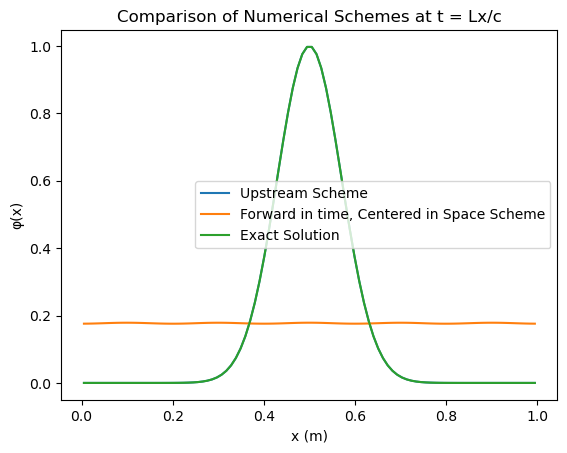

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as scifft

# Constants
c = 0.1 # m/s
a = 0.1 # m
Lx = 1 # m
Nx = 96 # grid points
dx = Lx/Nx # grid spacing
dt = dx/c # time step
mu = c*dt/dx # Courant number

# Initial condition
x = np.linspace(0.5*dx, Lx-0.5*dx, Nx) # staggered grid
phi0 = np.exp(-((x - Lx/2)**2)/a**2) # initial wave

# Exact solution
phi_ex = np.zeros(Nx) # solution array
phi_ex[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    phi_ex = np.roll(phi_ex, 1) # circular shift

# Fourier Transform
phi_ex_fft = scifft.fft(phi_ex) # FFT of exact solution
k = 2*np.pi*scifft.fftfreq(Nx, dx) # wave numbers
exp_kt = np.exp(-1j*k*c*dt) # exponential function

# Upstream scheme
phi_up = np.zeros(Nx) # solution array
phi_up[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    phi_up_fft = scifft.fft(phi_up) # FFT of solution
    phi_up_fft = phi_up_fft*exp_kt # time update
    phi_up = scifft.ifft(phi_up_fft).real # inverse FFT

# Forward in time, centered in space scheme
phi_fc = np.zeros(Nx) # solution array
phi_fc[:] = phi0[:] # initial condition
for n in range(int(Lx/c/dt)): # time loop
    phi_fc_fft = scifft.fft(phi_fc) # FFT of solution
    phi_fc_fft = phi_fc_fft*exp_kt*np.exp(-0.5j*mu*k**2) # time update
    phi_fc = scifft.ifft(phi_fc_fft).real # inverse FFT

# Plotting
plt.plot(x, phi_up, label='Upstream Scheme')
plt.plot(x, phi_fc, label='Forward in time, Centered in Space Scheme')
plt.plot(x, phi_ex, label='Exact Solution')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('φ(x)')
plt.title('Comparison of Numerical Schemes at t = Lx/c')
plt.show()


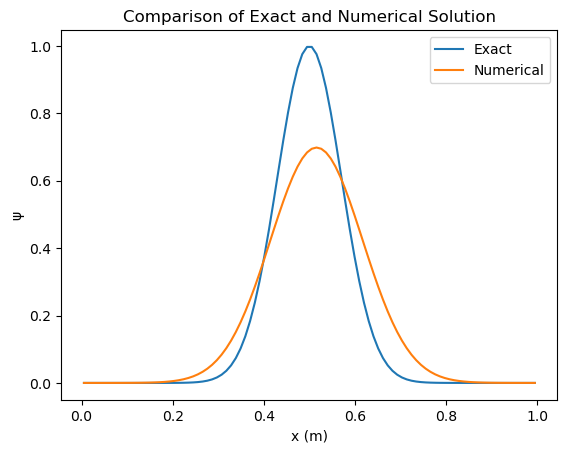

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 0.1 # m/s
Lx = 1.0 # m
a = 0.1 * Lx
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c

# Initial condition
def f(x):
    return np.exp(-((x - Lx/2)**2) / a**2)

# Exact solution at t = Lx/c
def exact_sol(x):
    return f((x - Lx/c + Lx) % Lx)

# Staggered periodic grid
x = np.linspace(-dx/2, Lx + dx/2, Nx + 2)
x = x[1:-1]

# Numerical solution
num_sol = f(x)
for t in np.arange(0, Lx/c, dt):
    num_sol[1:] = num_sol[1:] - c * dt / dx * (num_sol[1:] - num_sol[:-1])
    num_sol[0] = num_sol[-1]

# Plotting
plt.plot(x, exact_sol(x), label='Exact')
plt.plot(x, num_sol, label='Numerical')
plt.legend()
plt.xlabel('x (m)')
plt.xlim(')
plt.ylabel('ψ')
plt.title('Comparison of Exact and Numerical Solution')
plt.show()


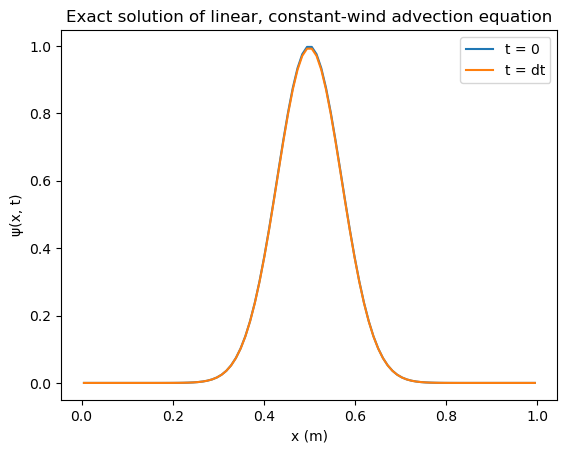

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Lx = 1  # length of domain
Nx = 96  # number of grid points
dx = Lx/Nx  # grid spacing
c = 0.1  # wind speed
mu = 0.5  # Courant number
dt = mu*dx/c  # time step

x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)  # staggered grid in x

def exact_solution(x, t):
    a = 0.1*Lx
    return np.exp(-((x-Lx/2)**2)/a**2)*np.exp(-c*t)

# plot exact solution at t = 0
plt.plot(x, exact_solution(x, 0), label='t = 0')

# plot exact solution at t = dt
plt.plot(x, exact_solution(x, dt), label='t = dt')

plt.legend()
plt.xlabel('x (m)')
plt.ylabel('ψ(x, t)')
plt.title('Exact solution of linear, constant-wind advection equation')
plt.show()


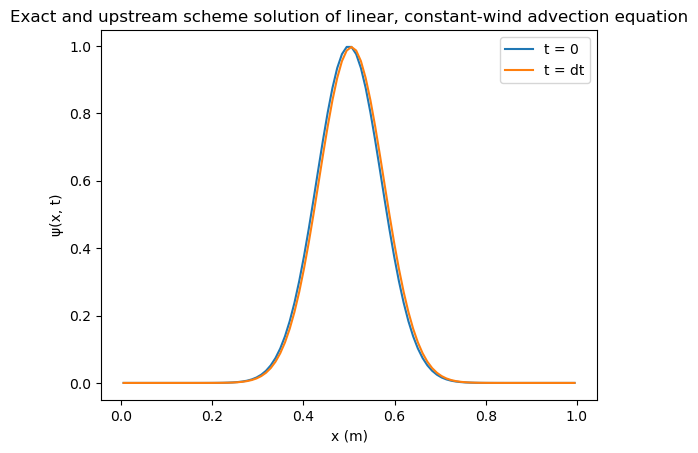

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Lx = 1  # length of domain
Nx = 96  # number of grid points
dx = Lx/Nx  # grid spacing
c = 0.1  # wind speed
mu = 0.5  # Courant number
dt = mu*dx/c  # time step

x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)  # staggered grid in x

def exact_solution(x, t):
    a = 0.1*Lx
    return np.exp(-((x-Lx/2)**2)/a**2)*np.exp(-c*t)

def upstream_scheme(phi, c, dt, dx):
    phi_new = np.zeros(Nx)
    for i in range(1, Nx-1):
        phi_new[i] = phi[i] - c*dt/dx*(phi[i]-phi[i-1])
    return phi_new

# initialize phi
phi = exact_solution(x, 0)

# plot exact solution at t = 0
plt.plot(x, exact_solution(x, 0), label='t = 0')

# plot upstream scheme solution at t = dt
plt.plot(x, upstream_scheme(phi, c, dt, dx), label='t = dt')

plt.legend()
plt.xlabel('x (m)')
plt.ylabel('ψ(x, t)')
plt.title('Exact and upstream scheme solution of linear, constant-wind advection equation')
plt.show()


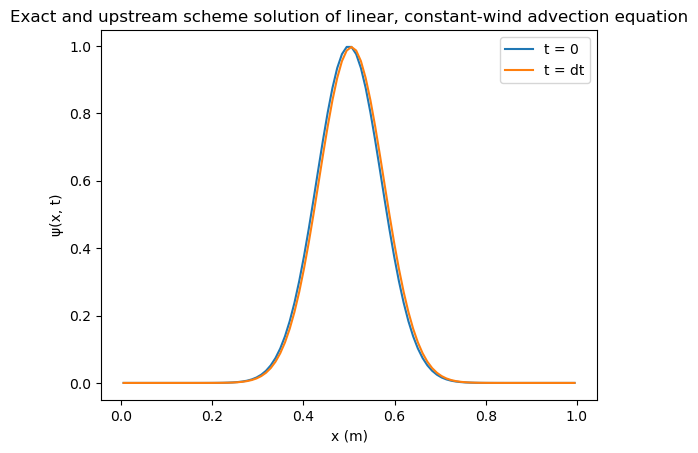

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Lx = 1  # length of domain
Nx = 96  # number of grid points
dx = Lx/Nx  # grid spacing
c = 0.1  # wind speed
mu = 0.5  # Courant number
dt = mu*dx/c  # time step

x = np.linspace(0.5*dx, Lx-0.5*dx, Nx)  # staggered grid in x

def exact_solution(x, t):
    a = 0.1*Lx
    return np.exp(-((x-Lx/2)**2)/a**2)*np.exp(-c*t)

def upstream_scheme(phi, c, dt, dx):
    phi_new = np.zeros(Nx)
    for i in range(1, Nx-1):
        phi_new[i] = phi[i] - c*dt/dx*(phi[i]-phi[i-1])
    # apply periodic boundary condition
    phi_new[0] = phi[0] - c*dt/dx*(phi[0]-phi[-2])
    phi_new[-1] = phi_new[0]
    return phi_new

# initialize phi
phi = exact_solution(x, 0)

# plot exact solution at t = 0
plt.plot(x, exact_solution(x, 0), label='t = 0')

# plot upstream scheme solution at t = dt
plt.plot(x, upstream_scheme(phi, c, dt, dx), label='t = dt')

plt.legend()
plt.xlabel('x (m)')
plt.ylabel('ψ(x, t)')
plt.title('Exact and upstream scheme solution of linear, constant-wind advection equation')
plt.show()


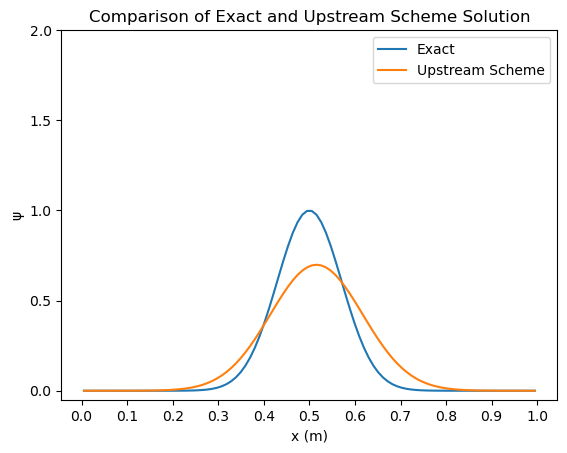

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 0.1 # m/s
Lx = 1.0 # m
a = 0.1 * Lx
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c

# Initial condition
def f(x):
    return np.exp(-((x - Lx/2)**2) / a**2)

# Exact solution at t = Lx/c
def exact_sol(x):
    return f((x - Lx/c + Lx) % Lx)

# Staggered periodic grid
x = np.linspace(-dx/2, Lx + dx/2, Nx + 2)
x = x[1:-1]

# Upstream scheme solution
num_sol = f(x)
for t in np.arange(0, Lx/c, dt):
    num_sol[1:] = num_sol[1:] - c * dt / dx * (num_sol[1:] - num_sol[:-1])
    num_sol[0] = num_sol[-1]

# Plotting
plt.plot(x, exact_sol(x), label='Exact')
plt.plot(x, num_sol, label='Upstream Scheme')
plt.legend()
plt.yticks(np.arange(0, 2.1, 0.5))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('x (m)')
plt.ylabel('ψ')
plt.title('Comparison of Exact and Upstream Scheme Solution')
plt.show()

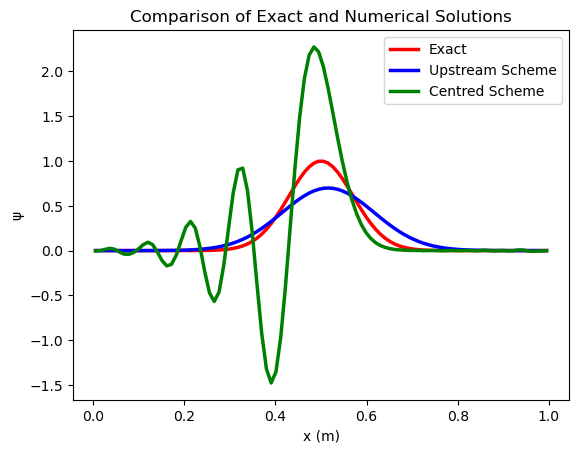

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 0.1 # m/s
Lx = 1.0 # m
a = 0.1 * Lx
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c

# Initial condition
def f(x):
    return np.exp(-((x - Lx/2)**2) / a**2)

# Exact solution at t = Lx/c
def exact_sol(x):
    return f((x - Lx/c + Lx) % Lx)

# Staggered periodic grid
x = np.linspace(-dx/2, Lx + dx/2, Nx + 2)
x = x[1:-1]

# Upstream scheme solution
num_sol_up = f(x)
for t in np.arange(0, Lx/c, dt):
    num_sol_up[1:] = num_sol_up[1:] - c * dt / dx * (num_sol_up[1:] - num_sol_up[:-1])
    num_sol_up[0] = num_sol_up[-1]

# Centred scheme solution
num_sol_centred = f(x)
for t in np.arange(0, Lx/c, dt):
    num_sol_centred[1:-1] = num_sol_centred[1:-1] - c * dt / (2 * dx) * (num_sol_centred[2:] - num_sol_centred[:-2])
    num_sol_centred[0] = num_sol_centred[-2]
    num_sol_centred[-1] = num_sol_centred[1]

# Plotting
plt.plot(x, exact_sol(x), label='Exact', color='red', linewidth=2.5)
plt.plot(x, num_sol_up, label='Upstream Scheme', color='blue', linewidth=2.5)
plt.plot(x, num_sol_centred, label='Centred Scheme', color='green', linewidth=2.5)
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('ψ')
plt.title('Comparison of Exact and Numerical Solutions')
plt.savefig('graph1.jpg', dpi=300)
plt.show()


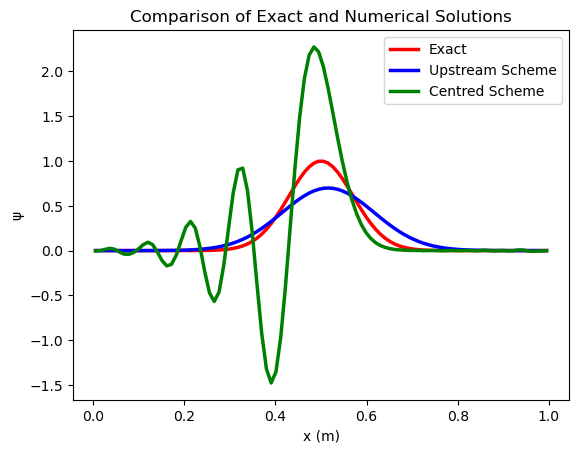

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Parameters
c = 0.1 # m/s
Lx = 1.0 # m
a = 0.1 * Lx
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c

# Initial condition
def f(x):
    return np.exp(-((x - Lx/2)**2) / a**2)

# FFT solution - Exact
k = 2 * np.pi * np.arange(Nx) / Lx
num_sol_fft = fft(f(x))
num_sol_fft *= np.exp(-1j * k * c * Lx / c)
exact_sol = np.real(ifft(num_sol_fft))

# Staggered periodic grid
x = np.linspace(-dx/2, Lx + dx/2, Nx + 2)
x = x[1:-1]

# Upstream scheme solution
num_sol_up = f(x)
for t in np.arange(0, Lx/c, dt):
    num_sol_up[1:] = num_sol_up[1:] - c * dt / dx * (num_sol_up[1:] - num_sol_up[:-1])
    num_sol_up[0] = num_sol_up[-1]

# Centred scheme solution
num_sol_centred = f(x)
for t in np.arange(0, Lx/c, dt):
    num_sol_centred[1:-1] = num_sol_centred[1:-1] - c * dt / (2 * dx) * (num_sol_centred[2:] - num_sol_centred[:-2])
    num_sol_centred[0] = num_sol_centred[-2]
    num_sol_centred[-1] = num_sol_centred[1]

# Plotting
plt.plot(x, exact_sol, label='Exact', color='red', linewidth=2.5)
plt.plot(x, num_sol_up, label='Upstream Scheme', color='blue', linewidth=2.5)
plt.plot(x, num_sol_centred, label='Centred Scheme', color='green', linewidth=2.5)
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('ψ')
plt.title('Comparison of Exact and Numerical Solutions')
plt.savefig('graph11.jpg', dpi=300)
plt.show()


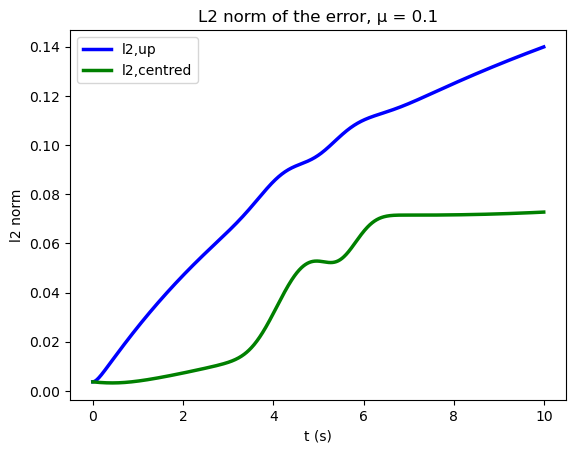

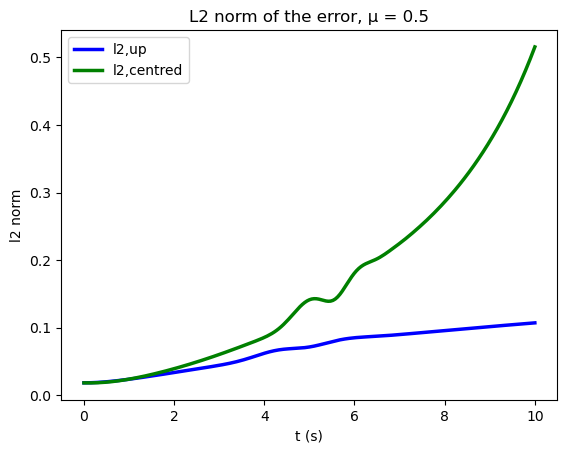

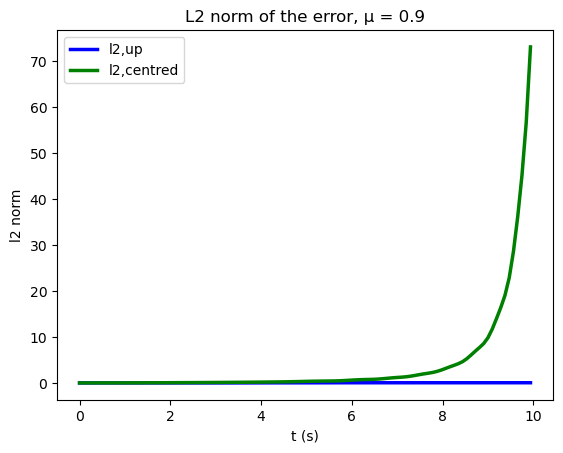

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def l2_norm(exact, num):
    return np.sqrt(np.sum((exact - num)**2) * dx)

# Parameters
c = 0.1 # m/s
Lx = 1.0 # m
a = 0.1 * Lx
Nx = 96
dx = Lx / Nx
dt = [0.1, 0.5, 0.9]
    
# Initial condition
def f(x):
    return np.exp(-((x - Lx/2)**2) / a**2)

# Exact solution at t = Lx/c
def exact_sol(x, t):
    return f((x - c * t + Lx) % Lx)

# Staggered periodic grid
x = np.linspace(-dx/2, Lx + dx/2, Nx + 2)
x = x[1:-1]

# Loop over different values of dt
for d in dt:
    dtt = d * dx / c
    
    # Time
    t = np.arange(0, Lx/c, dtt)
    
    # Upstream scheme solution
    num_sol_up = f(x)
    error_up = []
    for i in range(len(t)):
        num_sol_up[1:] = num_sol_up[1:] - c * dtt / dx * (num_sol_up[1:] - num_sol_up[:-1])
        num_sol_up[0] = num_sol_up[-1]
        error_up.append(l2_norm(exact_sol(x, t[i]), num_sol_up))
    
    # Centred scheme solution
    num_sol_centred = f(x)
    error_centred = []
    for i in range(len(t)):
        num_sol_centred[1:-1] = num_sol_centred[1:-1] - c * dtt / (2 * dx) * (num_sol_centred[2:] - num_sol_centred[:-2])
        num_sol_centred[0] = num_sol_centred[-2]
        num_sol_centred[-1] = num_sol_centred[1]
        error_centred.append(l2_norm(exact_sol(x, t[i]), num_sol_centred))
    
    # Plotting
    plt.plot(t, error_up, label='l2,up', color='blue', linewidth=2.5)
    plt.plot(t, error_centred, label='l2,centred', color='green', linewidth=2.5)
    plt.legend()
    plt.xlabel('t (s)')
    plt.ylabel('l2 norm')
    plt.title(f'L2 norm of the error, μ = {d}')
    plt.savefig('graph'+ str(d)+'.jpg', dpi=300)
    plt.show()
